In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [207]:
def span_correction(file_name, sheetname):
    '''Reading the excel sheet and create different PIVOT tables and charts for onsite % and Benefits 
    at summary LOB and detail Application levels'''

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder
    
    df_span = pd.read_excel(file_name, sheetname, skiprows=1)                    
    df_span.dropna(axis=0, how='all', inplace=True)
    df_span = df_span[:-1]    
    print("Input File Shape is {}".format(df_span.shape))
    print("Describing the numerical fields {}".format(df_span.describe()))
    print("Unique LOBs are {}".format(df_span['LOB'].unique()))
    
    df_span['LOB_num'] = df_span['LOB'].map({"Global Business Solutions": 1,
                      "International": 2,
                      "Global Financial Services": 3,
                      "Corporate": 4,
                      "NSS": 5,
                      "GIO": 6,
                      "MFA (Boarding)": 7,
                      "Digital Commerce": 8,
                      "Operations": 9,
                      "EAD": 10,
                      "OTHERS": 11,
                      "Others": 12
                     })
    
    #####Current % Onshore - LOB Level####
    current_pivot_table = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Current Location '], aggfunc=np.size)
    current_pivot_table.fillna(value=0, inplace=True)
    current_pivot_table['Grand Total'] = current_pivot_table['Offshore'] + current_pivot_table['Onsite']
    current_pivot_table['% Onshore'] = np.round((current_pivot_table['Onsite']/current_pivot_table['Grand Total'])*100)
    
    current_pivot_table_plot = current_pivot_table[current_pivot_table.index.get_level_values(1) == "N"]
    current_pivot_table_plot = current_pivot_table_plot.reset_index().sort_values(by='% Onshore', ascending=True)

    current_pivot_table_plot.plot(x=current_pivot_table_plot["LOB"], y='% Onshore', kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15, color='c')
    #plt.legend(['myline'])
    #plt.axis([10, 30, 10, 120])
    plt.ylabel("LOB")
    plt.xlabel("Current % Onshore")
    plt.title("Current % Onshore - LOB Level")
    #plt.show()
    plt.savefig("Current%_Onshore_LOB_Level.pdf",bbox_inches='tight')
    
    #####Future%_Onshore_LOB_Level#########
    future_pivot_table = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Final Location\n(Specify Offshore or Onsite)'], aggfunc=np.size)
    future_pivot_table.fillna(value=0, inplace=True)
    future_pivot_table['Grand Total'] = future_pivot_table['Offshore'] + future_pivot_table['Onsite']
    future_pivot_table['% Onshore'] = np.round((future_pivot_table['Onsite']/future_pivot_table['Grand Total'])*100)
    
    future_pivot_table_plot = future_pivot_table[future_pivot_table.index.get_level_values(1) == "N"]
    future_pivot_table_plot = future_pivot_table_plot.reset_index().sort_values(by='% Onshore', ascending=True)

    future_pivot_table_plot.plot(x=future_pivot_table_plot["LOB"], y='% Onshore', kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15, color='c')
    plt.ylabel("LOB")
    plt.xlabel("Future % Onshore")
    plt.title("Future % Onshore - LOB Level")
    #plt.show()
    plt.savefig("Future%_Onshore_LOB_Level.pdf",bbox_inches='tight')
    
    ######Current%_Onshore_Application_Level########
    current_pivot_table_dtl = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
                                     columns=['Current Location '], aggfunc=np.size)
    current_pivot_table_dtl.fillna(value=0, inplace=True)
    current_pivot_table_dtl['Grand Total'] = current_pivot_table_dtl['Offshore'] + current_pivot_table_dtl['Onsite']
    current_pivot_table_dtl['% Onshore'] = np.round((current_pivot_table_dtl['Onsite']/current_pivot_table_dtl['Grand Total'])*100)
    #current_pivot_table_dtl = current_pivot_table_dtl[current_pivot_table_dtl.index.get_level_values(7) == "N"]
    #current_pivot_table_dtl.sort_values(by='% Onshore', ascending=False)
    #current_pivot_table_dtl
    current_pivot_table_dtl_plot = current_pivot_table_dtl[current_pivot_table_dtl.index.get_level_values(7) == "N"]
    current_pivot_table_dtl_plot= current_pivot_table_dtl_plot.reset_index().sort_values(by="% Onshore")
    current_pivot_table_dtl_plot.plot(x=current_pivot_table_dtl_plot["Application Name"], y='% Onshore', kind='barh', 
                             figsize=(20,30), grid=True, color='c',fontsize=15)
    plt.ylabel("Application Name")
    plt.xlabel("Current % Onshore")
    plt.title("Current % Onshore - Application Level")
    #plt.show()
    plt.savefig("Current%_Onshore_Application_Level.pdf",bbox_inches='tight')
    
    #####Future%_Onshore_Application_Level######
    future_pivot_table_dtl = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
                                     columns=['Current Location '], aggfunc=np.size)
    future_pivot_table_dtl.fillna(value=0, inplace=True)
    future_pivot_table_dtl['Grand Total'] = future_pivot_table_dtl['Offshore'] + future_pivot_table_dtl['Onsite']
    future_pivot_table_dtl['% Onshore'] = np.round((future_pivot_table_dtl['Onsite']/future_pivot_table_dtl['Grand Total'])*100)
    
    #future_pivot_table_dtl
    future_pivot_table_dtl_plot = future_pivot_table_dtl[future_pivot_table_dtl.index.get_level_values(7) == "N"]
    future_pivot_table_dtl_plot= future_pivot_table_dtl_plot.reset_index().sort_values(by="% Onshore")
    future_pivot_table_dtl_plot.plot(x=future_pivot_table_dtl_plot["Application Name"], y='% Onshore', kind='barh', 
                            figsize=(20,30), grid=True, color='c',fontsize=15)
    plt.ylabel("Application Name")
    plt.xlabel("Future % Onshore")
    plt.title("Future % Onshore - Application Level")
    #plt.show()
    plt.savefig("Future%_Onshore_Application_Level.pdf",bbox_inches='tight')
    
    #####Current_SPAN%_LOB_Level#####
    current_span_table = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Current SPAN'], aggfunc=np.size)
    current_span_table.fillna(value=0, inplace=True)
    current_span_table['Grand Total'] = current_span_table['L1'] + current_span_table['L2'] + current_span_table['L3']
    current_span_table['L1 %'] = np.round((current_span_table['L1']/current_span_table['Grand Total'])*100)
    current_span_table['L2 %'] = np.round((current_span_table['L2']/current_span_table['Grand Total'])*100)
    current_span_table['L3 %'] = np.round((current_span_table['L3']/current_span_table['Grand Total'])*100)
    
    current_span_table_plot = current_span_table[current_span_table.index.get_level_values(1) == "N"]
    current_span_table_plot = current_span_table_plot.reset_index().sort_values(by=['L3 %', 'L2 %', 'L1 %'], ascending=True)

    current_span_table_plot.plot(x=current_pivot_table_plot["LOB"], y=['L1 %', 'L2 %', 'L3 %'], kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15)
    #current_span_table.plot(x=current_span_table.index.get_level_values(0), y=['L1 %', 'L2 %', 'L3 %'], kind='bar', 
    #                     figsize=(10,8), grid=True)
    plt.ylabel("LOB")
    plt.xlabel("Current SPAN level %")
    plt.title("Current SPAN % - LOB Level")
    #plt.show()
    plt.savefig("Current_SPAN%_LOB_Level.pdf",bbox_inches='tight')
    
    
    df_span_latest = df_span[(df_span['Final Span\n(Specify L1 or L2 or L3) '] == 'L1') | 
                         (df_span['Final Span\n(Specify L1 or L2 or L3) '] == 'L2') |
                         (df_span['Final Span\n(Specify L1 or L2 or L3) '] == 'L3')]
    
    ####Future_SPAN%_LOB_Level#####
    future_span_table = pd.pivot_table(data=df_span_latest,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Final Span\n(Specify L1 or L2 or L3) '], aggfunc=np.size)
    future_span_table.fillna(value=0, inplace=True)
    future_span_table['Grand Total'] = future_span_table['L1'] + future_span_table['L2'] + future_span_table['L3']
    future_span_table['L1 %'] = np.round((future_span_table['L1']/future_span_table['Grand Total'])*100)
    future_span_table['L2 %'] = np.round((future_span_table['L2']/future_span_table['Grand Total'])*100)
    future_span_table['L3 %'] = np.round((future_span_table['L3']/future_span_table['Grand Total'])*100)
    
    future_span_table_plot = future_span_table[future_span_table.index.get_level_values(1) == "N"]
    future_span_table_plot = future_span_table_plot.reset_index().sort_values(by=['L3 %', 'L2 %', 'L1 %'], ascending=True)

    future_span_table_plot.plot(x=future_span_table_plot["LOB"], y=['L1 %', 'L2 %', 'L3 %'], kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15)
    plt.ylabel("LOB")
    plt.xlabel("Future SPAN level %")
    plt.title("Future SPAN % - LOB Level")
    #plt.show()
    plt.savefig("Future_SPAN%_LOB_Level.pdf",bbox_inches='tight')
    
    ###Current State Span Details####
    current_span_table_dtl = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
        columns=['Current SPAN'], aggfunc=np.size)
    current_span_table_dtl.fillna(value=0, inplace=True)
    current_span_table_dtl['Grand Total'] = current_span_table_dtl['L1'] + current_span_table_dtl['L2'] + current_span_table_dtl['L3']
    current_span_table_dtl['L1 %'] = np.round((current_span_table_dtl['L1']/current_span_table_dtl['Grand Total'])*100)
    current_span_table_dtl['L2 %'] = np.round((current_span_table_dtl['L2']/current_span_table_dtl['Grand Total'])*100)
    current_span_table_dtl['L3 %'] = np.round((current_span_table_dtl['L3']/current_span_table_dtl['Grand Total'])*100)
    #current_span_table_dtl
    
    current_span_table_dtl_plot = current_span_table_dtl[current_span_table_dtl.index.get_level_values(7) == "N"]
    current_span_table_dtl_plot= current_span_table_dtl_plot.reset_index().sort_values(by=['L3 %', 'L2 %', 'L1 %'])
    current_span_table_dtl_plot.plot(x=current_span_table_dtl_plot["Application Name"], y=['L1 %', 'L2 %', 'L3 %'], kind='barh', 
                             figsize=(20,70), grid=True,fontsize=15)
    plt.ylabel("Application Name")
    plt.xlabel("Current SPAN %")
    plt.title("Current SPAN % - Application Level")
    
    plt.savefig("Current_SPAN%_Application_Level.pdf",bbox_inches='tight')
    
    #####Future State Span Details######
    future_span_table_dtl = pd.pivot_table(data=df_span_latest,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
        columns=['Final Span\n(Specify L1 or L2 or L3) '], aggfunc=np.size)
    future_span_table_dtl.fillna(value=0, inplace=True)
    future_span_table_dtl['Grand Total'] = future_span_table_dtl['L1'] + future_span_table_dtl['L2'] + future_span_table_dtl['L3']
    future_span_table_dtl['L1 %'] = np.round((future_span_table_dtl['L1']/future_span_table_dtl['Grand Total'])*100)
    future_span_table_dtl['L2 %'] = np.round((future_span_table_dtl['L2']/future_span_table_dtl['Grand Total'])*100)
    future_span_table_dtl['L3 %'] = np.round((future_span_table_dtl['L3']/future_span_table_dtl['Grand Total'])*100)
    #future_span_table_dtl
    
    future_span_table_dtl_plot = future_span_table_dtl[future_span_table_dtl.index.get_level_values(7) == "N"]
    future_span_table_dtl_plot = future_span_table_dtl_plot.reset_index().sort_values(by=['L3 %', 'L2 %', 'L1 %'])
    future_span_table_dtl_plot.plot(x=future_span_table_dtl_plot["Application Name"], y=['L1 %', 'L2 %', 'L3 %'], kind='barh', 
                             figsize=(20,70), grid=True,fontsize=15)
    plt.ylabel("Application Name")
    plt.xlabel("Future SPAN %")
    plt.title("Future SPAN % - Application Level")
    
    plt.savefig("Future_SPAN%_Application_Level.pdf",bbox_inches='tight')
    
    ###Benefit Analysis -Application Level#####
    span_table_dtl = pd.pivot_table(data=df_span_latest,values=['$$ Benefits', 'Total $$.1', 'Total $$'], index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
        aggfunc=np.sum)
    span_table_dtl.fillna(value=0, inplace=True)
    
    span_table_dtl_plot = span_table_dtl[span_table_dtl.index.get_level_values(7) == "N"]
    span_table_dtl_plot = span_table_dtl_plot.reset_index().sort_values(by="$$ Benefits")
    span_table_dtl_plot = span_table_dtl_plot[["Application Name", "$$ Benefits"]]
    span_table_dtl_plot.rename(columns={'$$ Benefits': 'Benefits'}, inplace=True)
    
    span_table_dtl_plot.plot(x="Application Name", y="Benefits", kind='barh', 
                         figsize=(20,30), grid=True, color='c',fontsize=15)
    plt.xlabel("Benefits")
    plt.ylabel("Application Name")
    plt.title("Benefits - Application Level")

    plt.savefig("Benefits_Application_Level.pdf",bbox_inches='tight')
    
    ##Benefit Analysis LOB Level#####
    span_table_dtl1 = pd.pivot_table(data=df_span_latest,values=['$$ Benefits', 'Total $$.1', 'Total $$'], index=['LOB',
                'is Excluded (Y/N)'], aggfunc=np.sum)
    span_table_dtl1.fillna(value=0, inplace=True)
    span_table_dtl1['% Benefits'] = np.round((span_table_dtl1['$$ Benefits']/span_table_dtl1['Total $$'])*100)
    span_table_dtl1 = span_table_dtl1.query('LOB == ["Corporate", "Digital Commerce", "EAD", "GIO","Global Business Solutions", "Global Financial Services","MFA (Boarding)", "NSS"]')
    span_table_dtl1 = span_table_dtl1[span_table_dtl1.index.get_level_values(1) == "N"]
    #span_table_dtl1
    #span_table_dtl1.plot(x=span_table_dtl1.index.get_level_values(0), y=['% Benefits'], kind='bar', 
    #                     figsize=(10,8), grid=True)
    
    span_table_dtl1_plot = span_table_dtl1.reset_index().sort_values(by=['% Benefits'], ascending=True)

    span_table_dtl1_plot.plot(x=span_table_dtl1_plot["LOB"], y=['% Benefits'], kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15, color='c')
    plt.ylabel("LOB")
    plt.xlabel("% Benefits")
    plt.title("% Benefits - LOB Level")
    #plt.show()
    plt.savefig("Benefits_LOB_Level.pdf",bbox_inches='tight')
    
    
    ## Write to Excel

    writer = pd.ExcelWriter('ON_OFF_SPAN_Corrections_Final_09052018.xlsx')
    df_span.to_excel(writer,'Associate Base Data')
    current_pivot_table.to_excel(writer,'Current On-Off LOB level')
    future_pivot_table.to_excel(writer,'Future On-Off LOB level')
    current_pivot_table_dtl.to_excel(writer,'Current On-Off Appl level')
    future_pivot_table_dtl.to_excel(writer,'Future On-Off Appl level')
    current_span_table.to_excel(writer,'Current SPAN LOB level')
    future_span_table.to_excel(writer,'Future SPAN LOB level')
    current_span_table_dtl.to_excel(writer,'Current SPAN APPL level')
    future_span_table_dtl.to_excel(writer,'Future SPAN APPL level')
    span_table_dtl.to_excel(writer, 'Benefit Analysis - APPL level')
    span_table_dtl1.to_excel(writer, 'Benefit Analysis -LOB level')

    writer.save()

Input File Shape is (1134, 29)
Describing the numerical fields        Current Rate      Total $$  The revised  Rate    Total $$.1  \
count   1134.000000  1.134000e+03        1134.000000  1.134000e+03   
mean      78.031631  1.573118e+05          76.717187  1.546618e+05   
std      223.075209  4.497196e+05         223.228166  4.500280e+05   
min       20.600000  4.152960e+04          20.600000  4.152960e+04   
25%       24.720000  4.983552e+04          24.720000  4.983552e+04   
50%       28.840000  5.814144e+04          28.840000  5.814144e+04   
75%       66.950000  1.349712e+05          66.950000  1.349712e+05   
max     1980.000000  3.991680e+06        1980.000000  3.991680e+06   

         $$ Benefits  
count    1134.000000  
mean     2649.920000  
std     15312.137836  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max    191036.160000  
Unique LOBs are ['Corporate' 'Digital Commerce' 'EAD' 'GIO' 'Global Business Solutions'
 'Global Fi

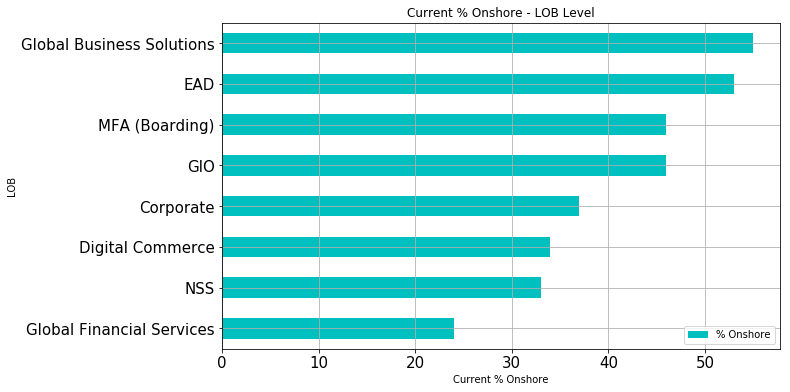

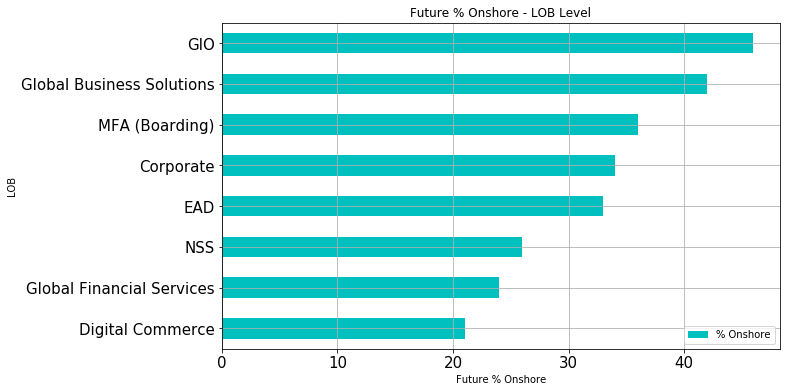

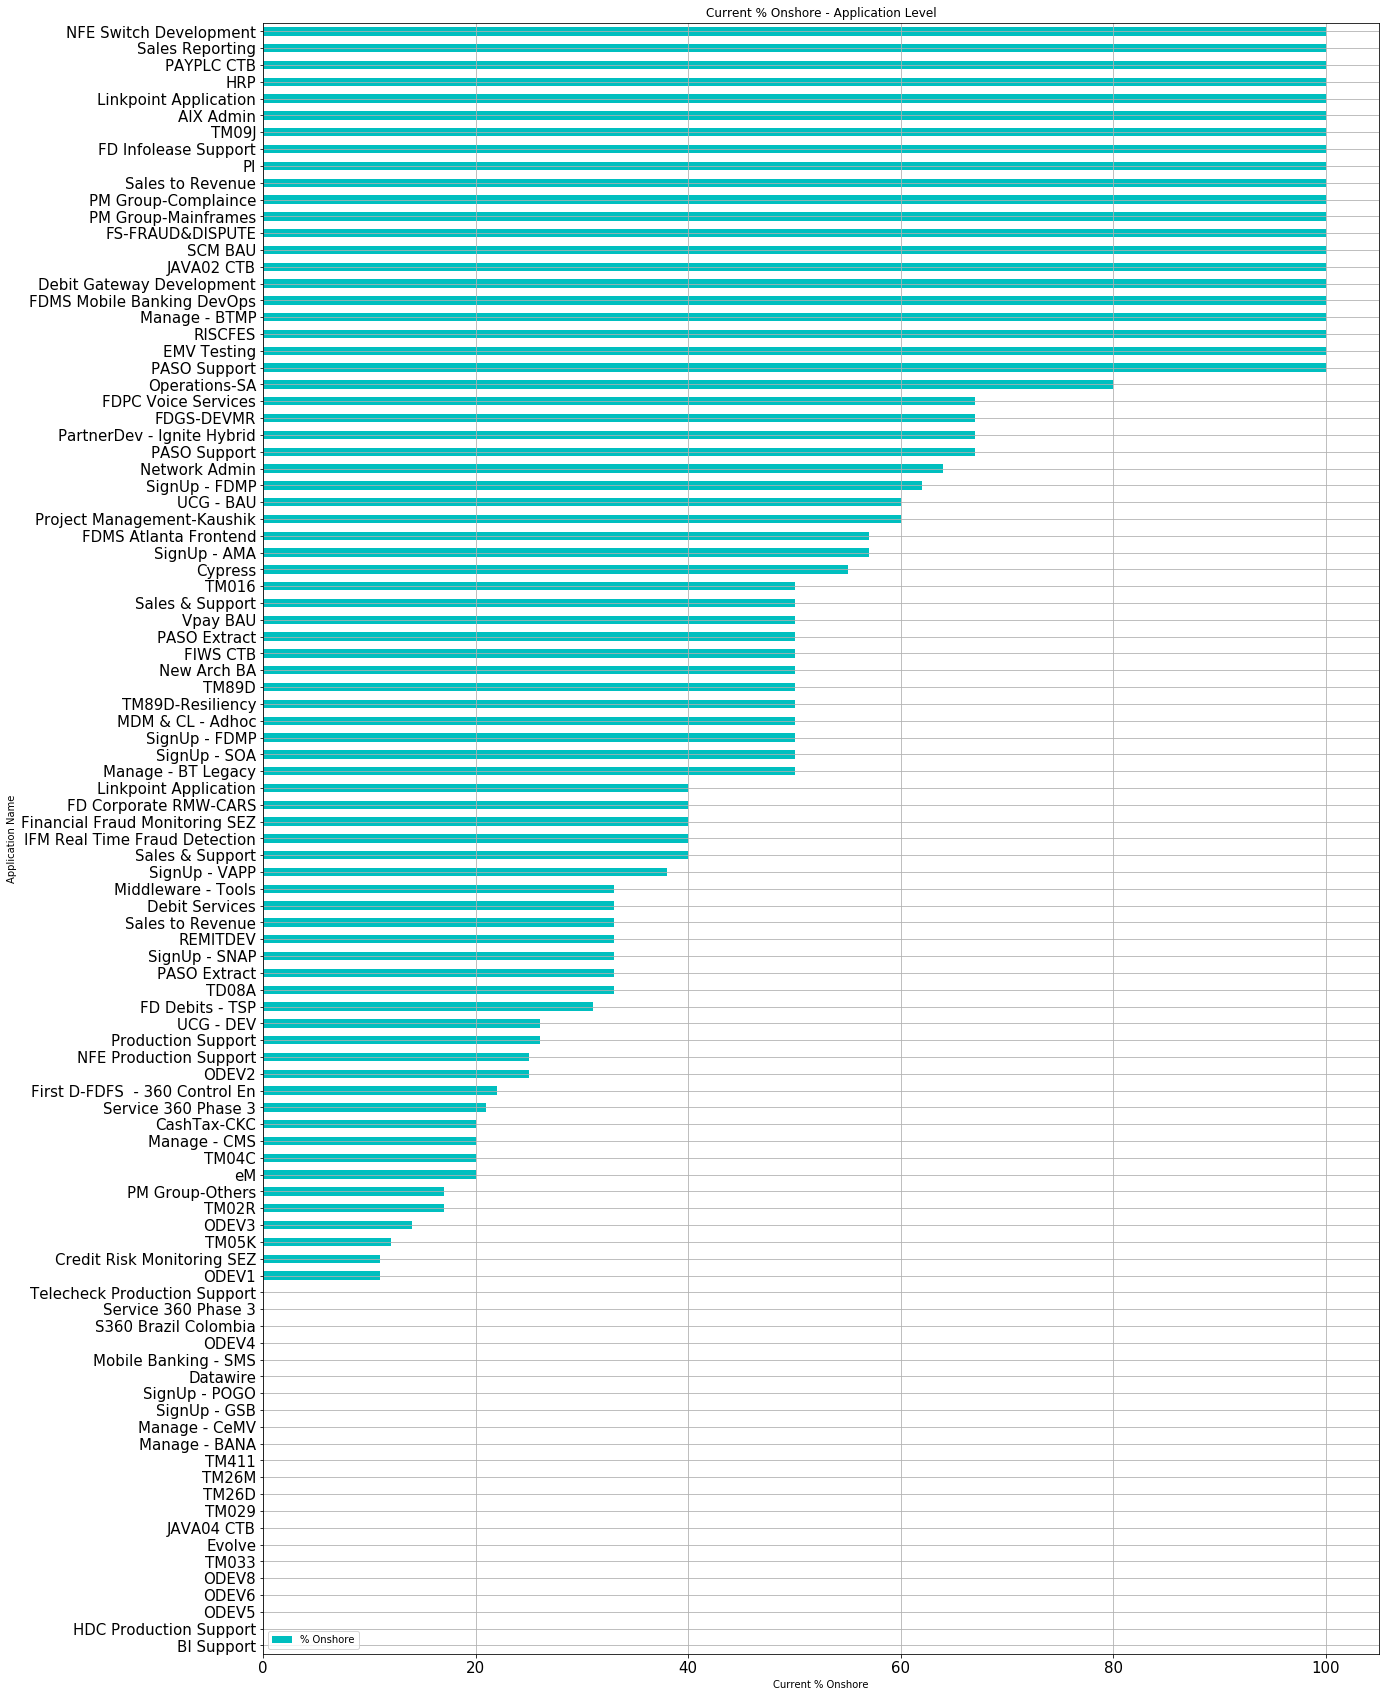

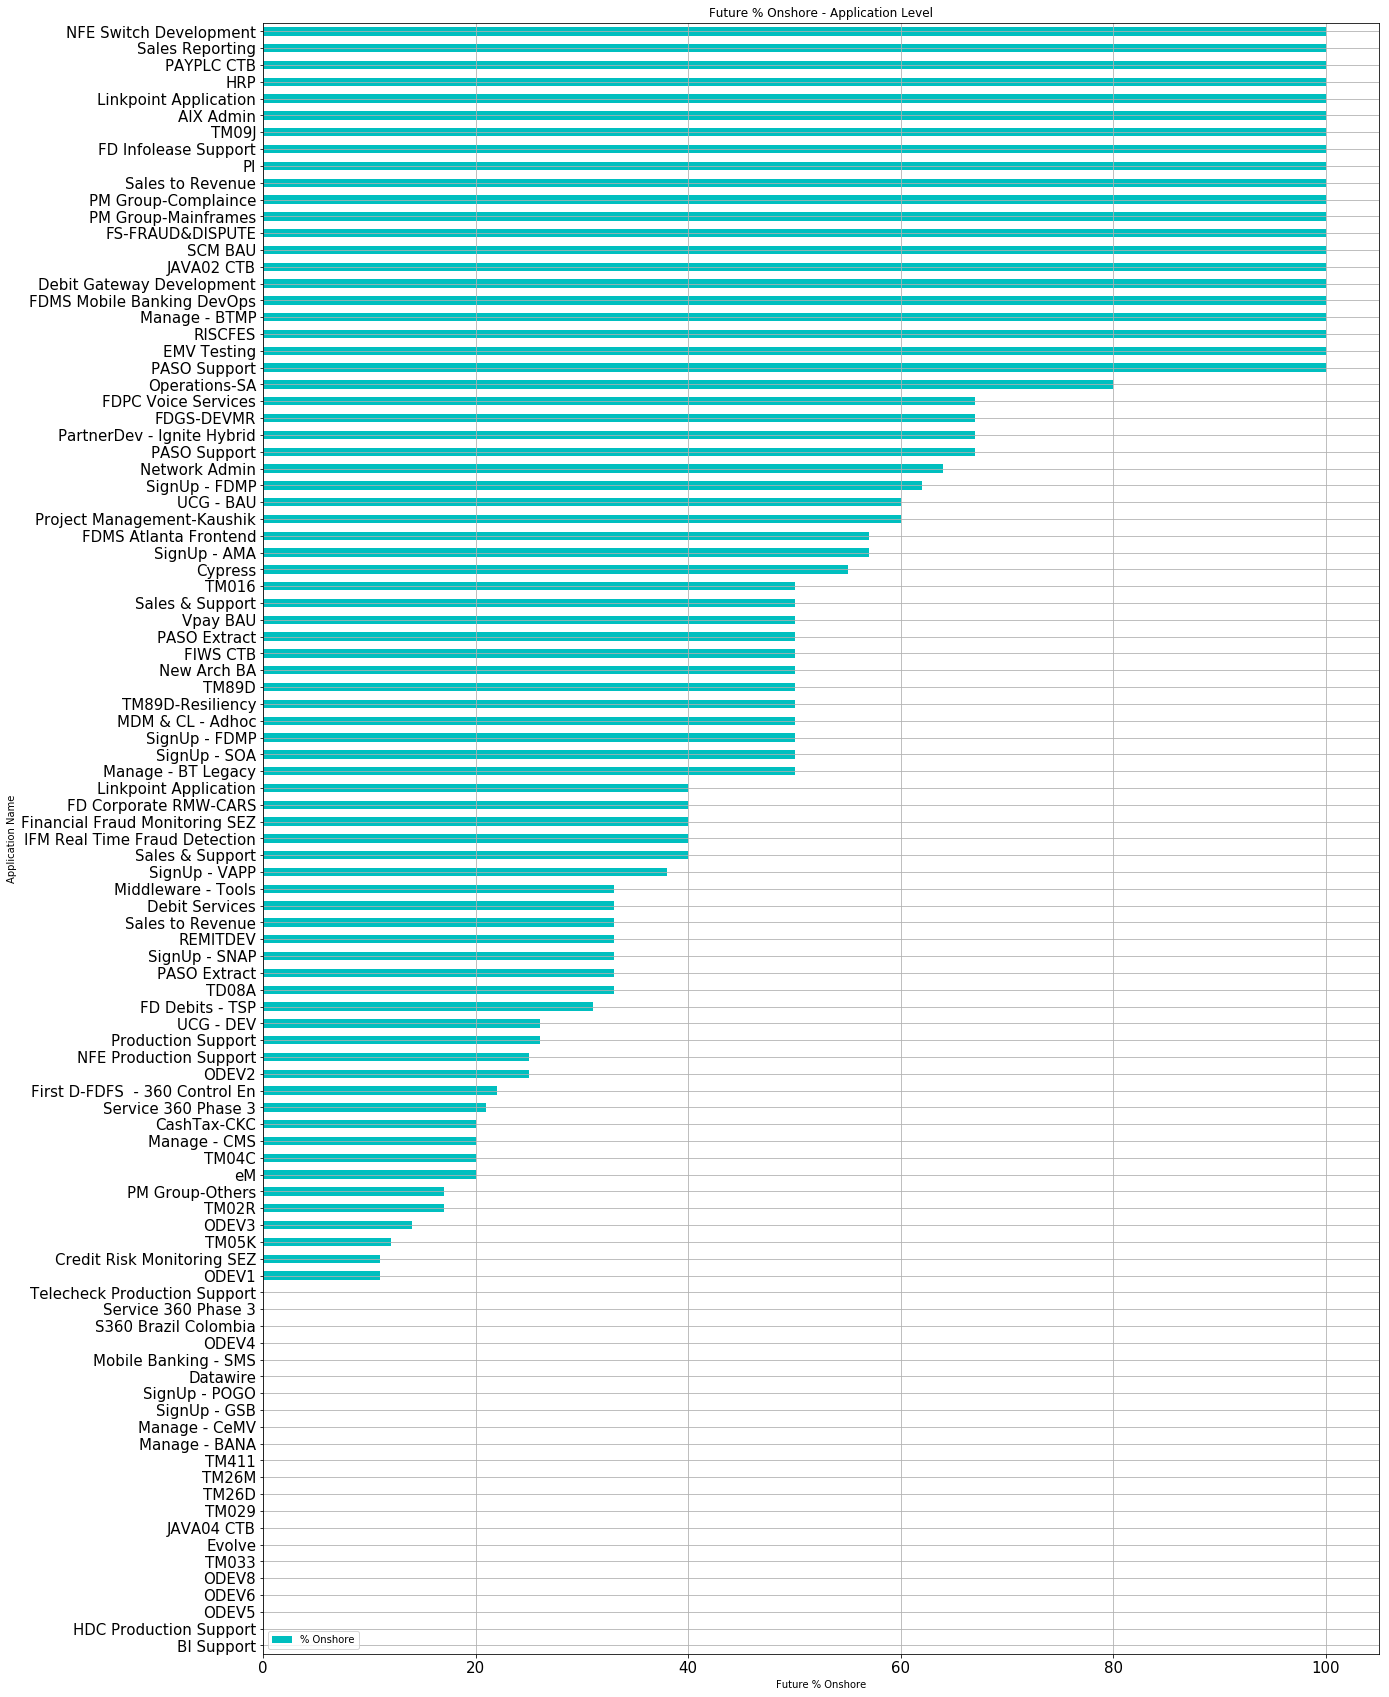

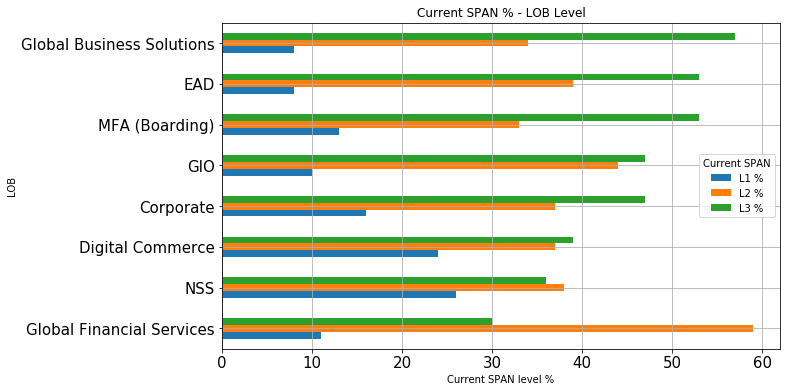

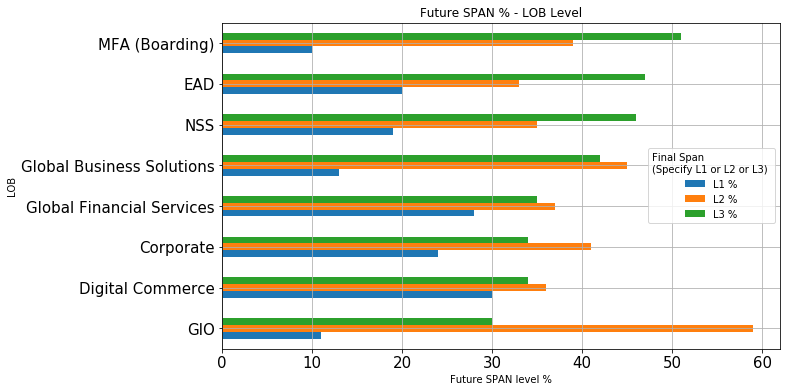

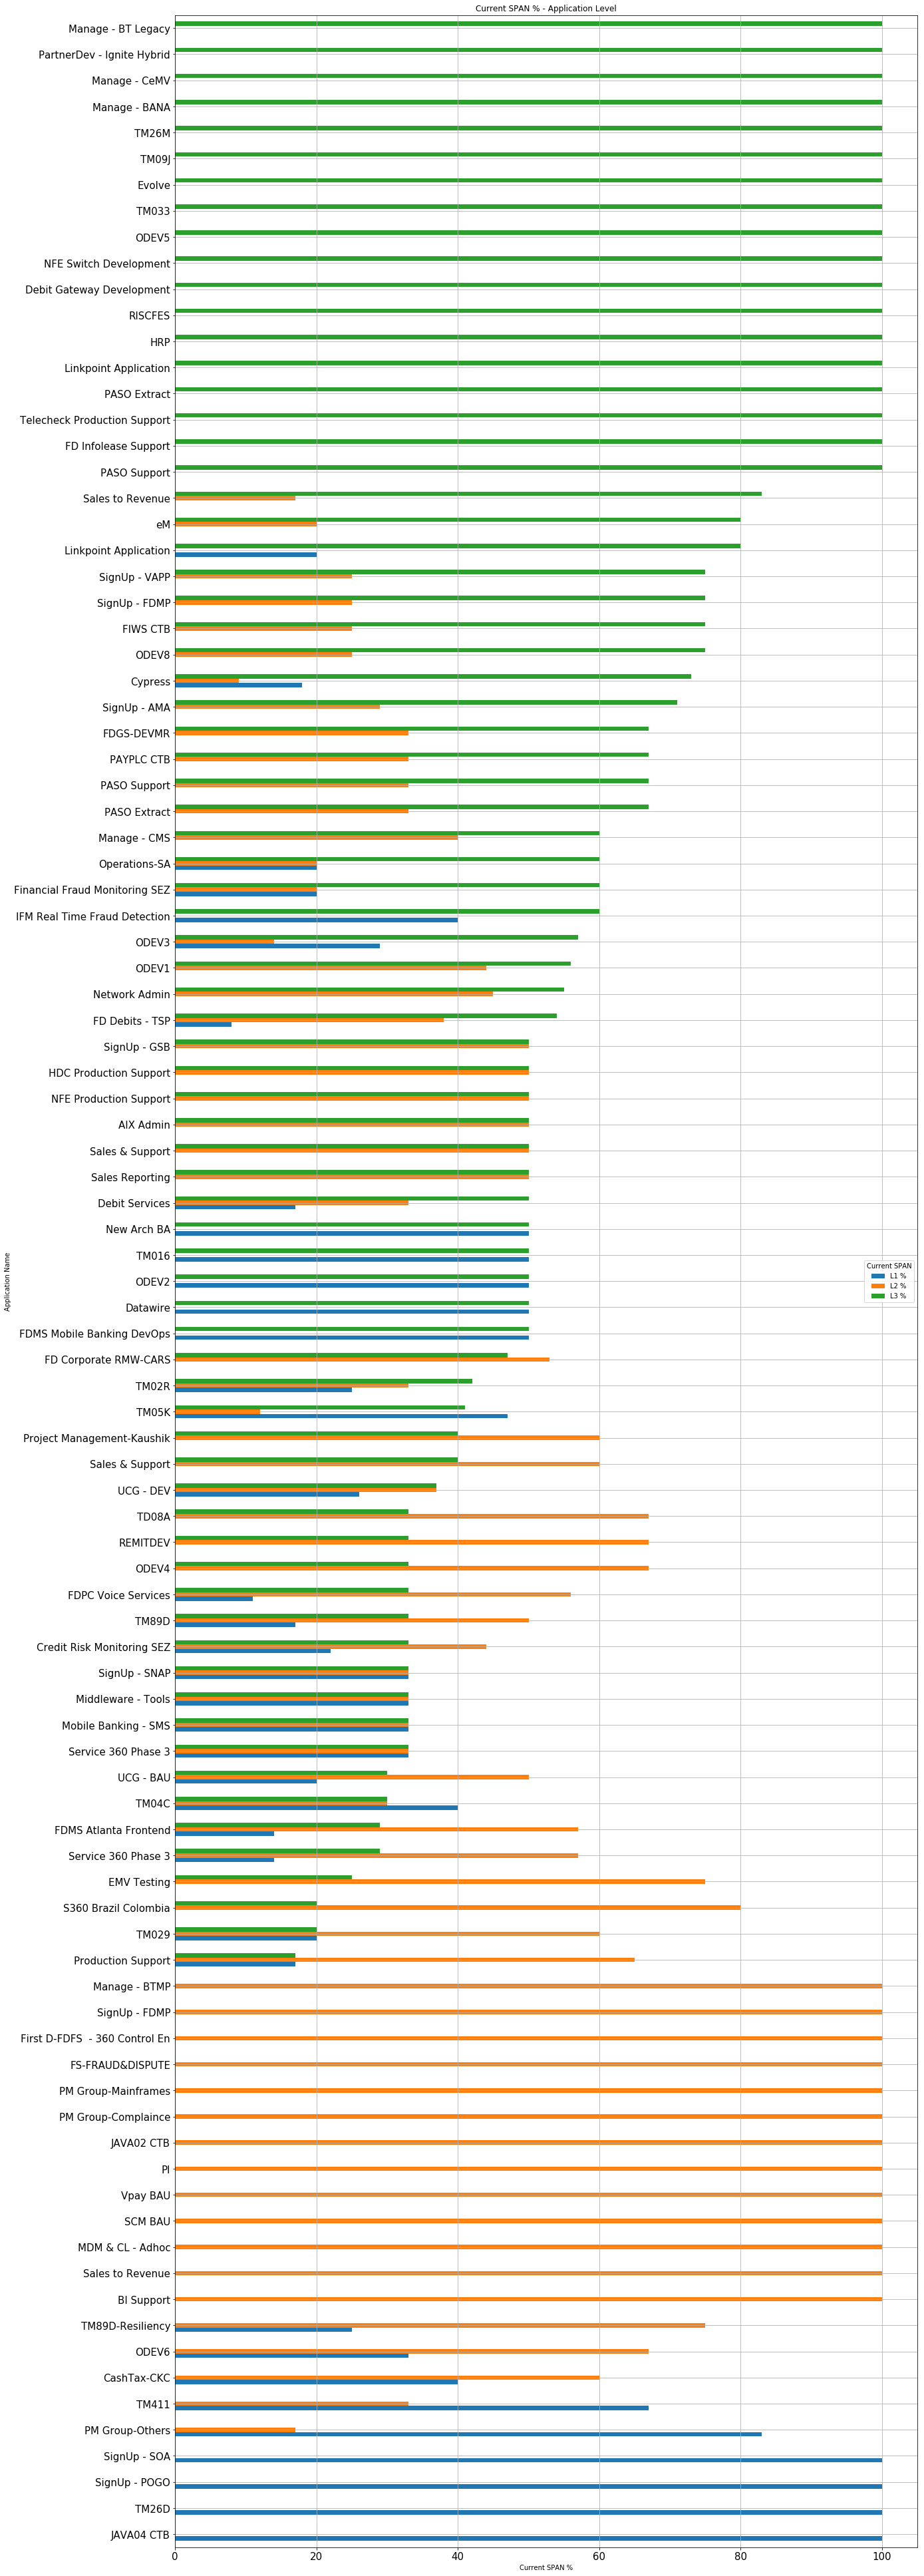

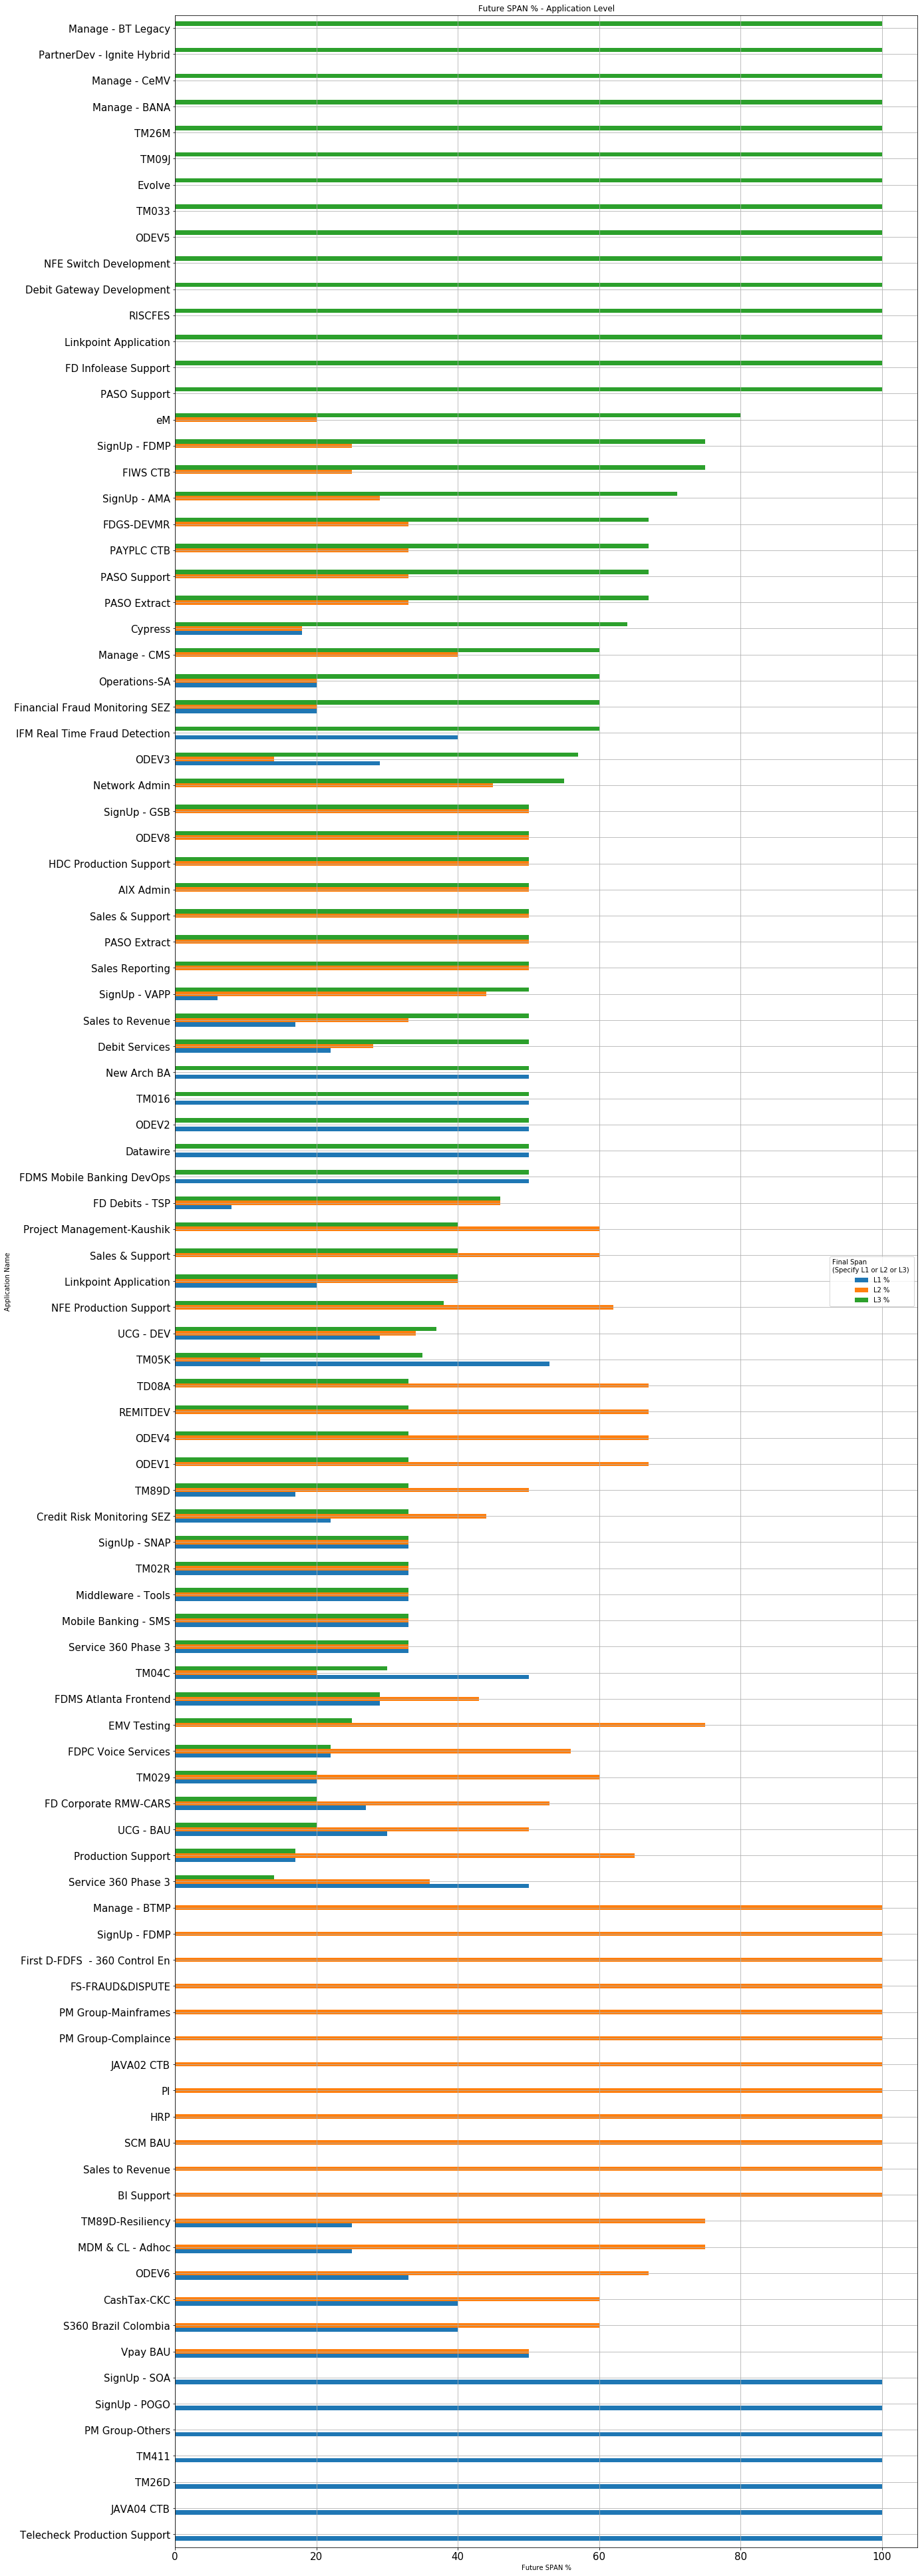

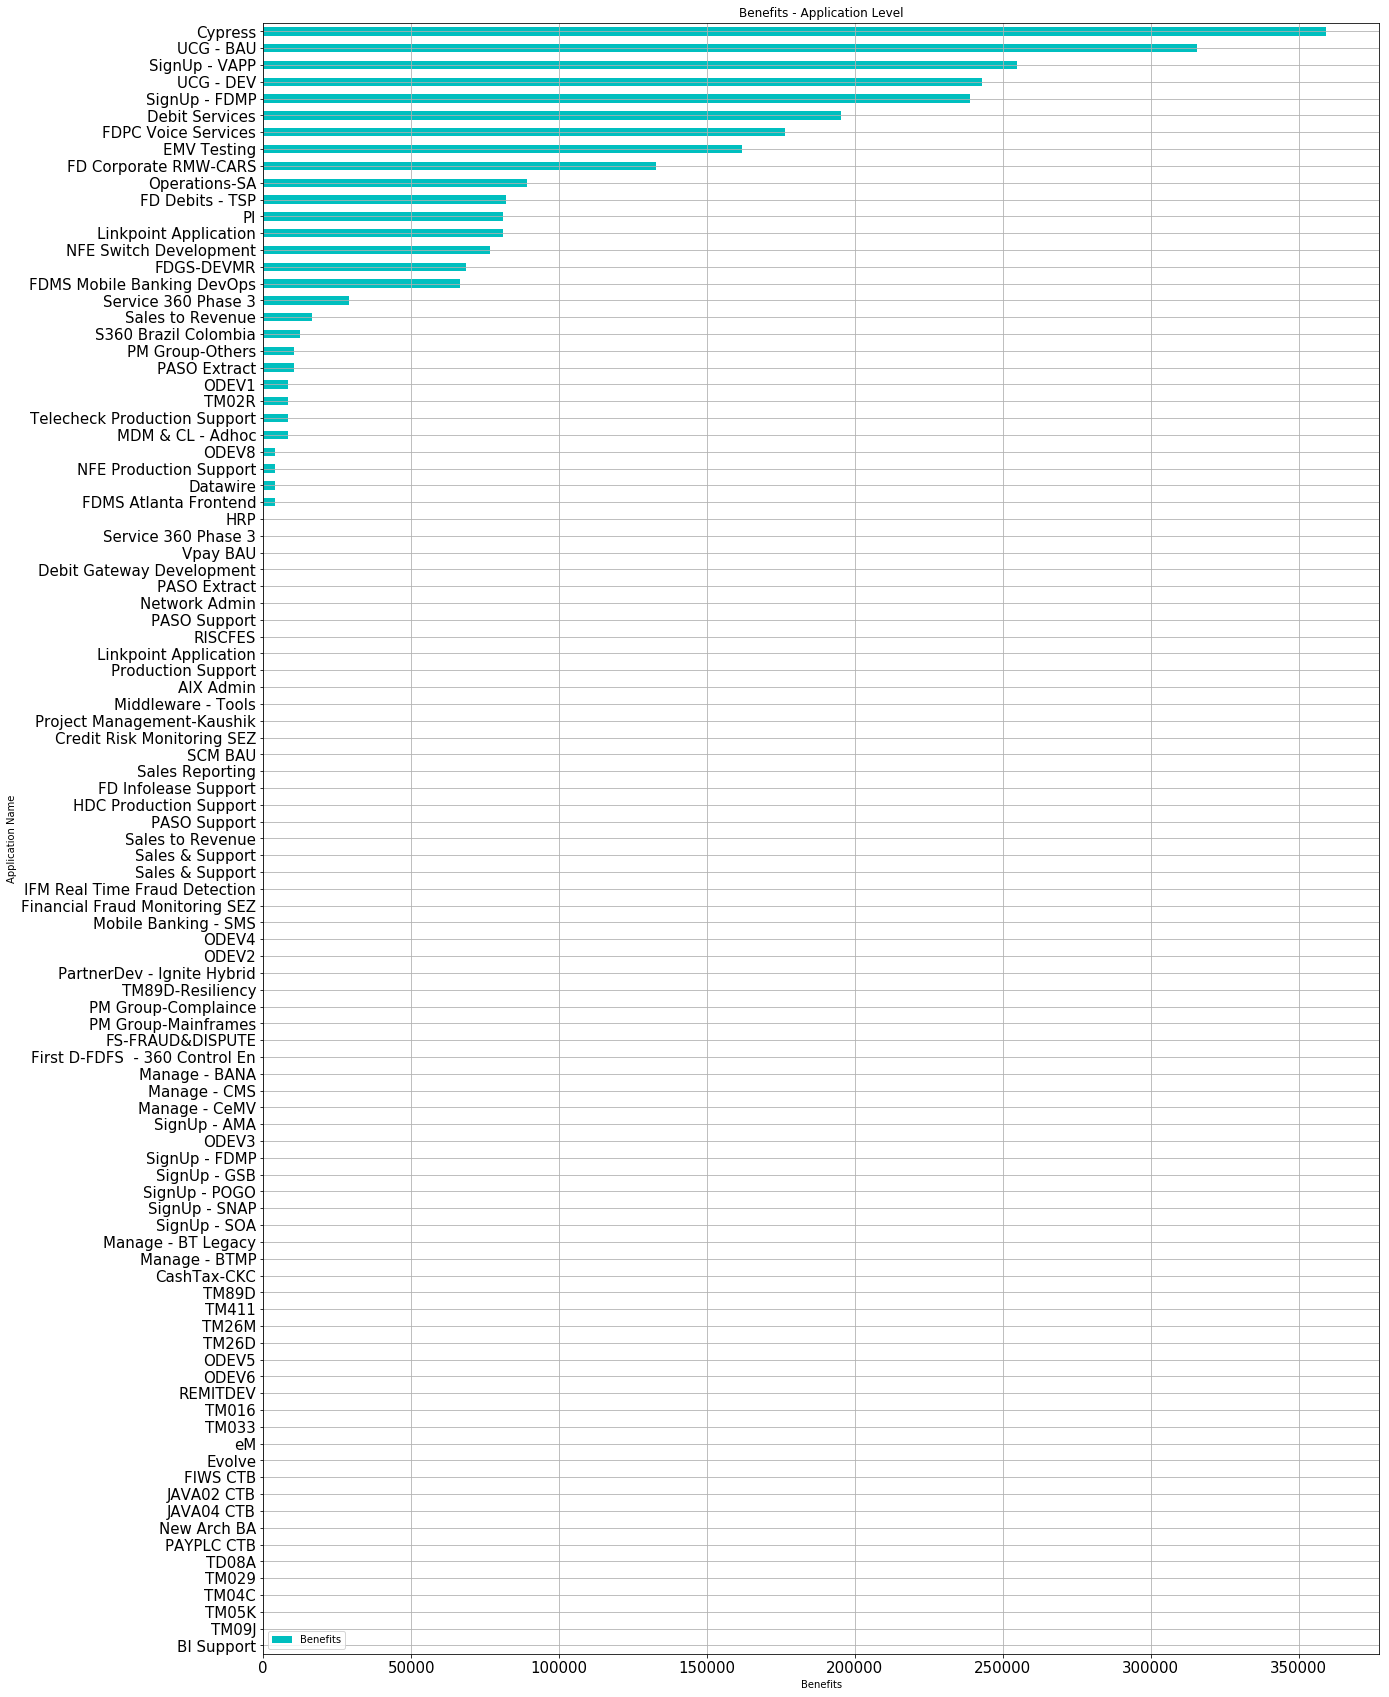

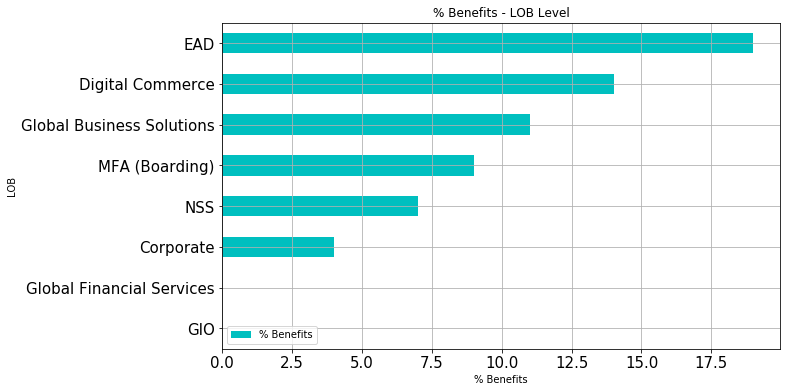

In [208]:
span_correction(file_name="ON_OFF_SPAN_Corrections_Final Inputs -04252018.xlsx", sheetname="Associate Base Data")

In [164]:
df_span = pd.read_excel("ON_OFF_SPAN_Corrections_Final Inputs -04252018.xlsx", sheetname="Associate Base Data", 
                        skiprows=1)
df_span.dropna(axis=0, how='all', inplace=True)
df_span = df_span[:-1]

In [3]:
df_span.tail(100)

,Associate ID,Associate Name,LAN ID,Current Location,Current City,Current Rate,Total $$,Job Title,Current SPAN,Application Name,...,SPAN Correction (Y/N),On / Off Correction (Y/N),Engagement Type,is Excluded (Y/N),Final Span (Specify L1 or L2 or L3),Final Location (Specify Offshore or Onsite),The revised Rate,Total $$.1,$$ Benefits,Comments from EM
1034,471089,"Piyush,Verma",F1Y5NTY,Onsite,Wilmington,77.25,155736.00,L3,L3,Debit Services,...,N,Y,Type II,N,L3,Offshore,30.90,62294.40,93441.60,Proposed changes yet to be socialized with Lin...
1035,469949,"Prasad,Rajapantula",FBDCD8R,Onsite,Wilmington,72.10,145353.60,L3,L1,Debit Services,...,N,N,Type II,N,L1,Onsite,72.10,145353.60,0.00,NaN
1036,450176,"Thirukumaran,Chinnasamy",F821OKV,Onsite,Wilmington,77.25,155736.00,L2,L3,Debit Services,...,N,N,Type II,N,L3,Onsite,77.25,155736.00,0.00,NaN
1037,451109,"Vasudevan,Venkataraman",F9V45RI,Onsite,Wilmington,77.25,155736.00,L3,L3,Debit Services,...,N,Y,Type II,N,L3,Offshore,30.90,62294.40,93441.60,Proposed changes yet to be socialized with Lin...
1038,174177,"Vivek,Chanadickal Saseendran",F21T3X9,Onsite,Wilmington,72.10,145353.60,L1,L1,Debit Services,...,N,N,Type II,N,L1,Onsite,72.10,145353.60,0.00,NaN
1039,158555,"Indrajit,Majumder",imajumde,Onsite,Wilmington,65.00,131040.00,Application Development / Application Lead / B...,L3,FD Debits - TSP,...,N,Y,Type II,N,L3,Offshore,26.78,53988.48,77051.52,Proposed changes yet to be socialized with Lin...
1040,189516,"Santosh Kumar,Mishra",smishr06,Onsite,Atlanta,90.00,181440.00,Application Development / Application Develope...,L3,FD Debits - TSP,...,N,N,Type II,N,L3,Onsite,90.00,181440.00,0.00,NaN
1041,262881,"Sivasankar,Anandadoss",fcsa6eg,Onsite,Wilmington,65.00,131040.00,Application Development / Application Lead / B...,L3,FD Debits - TSP,...,N,N,Type II,N,L3,Onsite,65.00,131040.00,0.00,NaN
1042,467894,"Vinoth,Selvaraj",NaN,Onsite,Wilmington,110.00,221760.00,Niche 2 Skills / N2-Technical Lead,L3,FD Debits - TSP,...,N,N,Type II,N,L3,Onsite,110.00,221760.00,0.00,NaN
1043,228478,"Sunirmal,Kar",F4ZBT4D,Offshore,Kolkata,26.78,53988.48,Application Development / Application Develope...,L3,FDGS-DEVMR,...,0,N,NaN,N,L3,Offshore,26.78,53988.48,0.00,Cannot be replaced due to project dependencies


In [165]:
df_span.shape

(1134, 29)

In [166]:
df_span.describe()

,Current Rate,Total $$,The revised Rate,Total $$.1,$$ Benefits
count,1134.000000,1.134000e+03,1134.000000,1.134000e+03,1134.000000
mean,78.031631,1.573118e+05,76.717187,1.546618e+05,2649.920000
std,223.075209,4.497196e+05,223.228166,4.500280e+05,15312.137836
min,20.600000,4.152960e+04,20.600000,4.152960e+04,0.000000
25%,24.720000,4.983552e+04,24.720000,4.983552e+04,0.000000
50%,28.840000,5.814144e+04,28.840000,5.814144e+04,0.000000
75%,66.950000,1.349712e+05,66.950000,1.349712e+05,0.000000
max,1980.000000,3.991680e+06,1980.000000,3.991680e+06,191036.160000


In [22]:
df_span.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 31 columns):
S. No.                                             1134 non-null float64
Associate ID                                       1134 non-null object
Associate Name                                     1134 non-null object
LAN ID                                             985 non-null object
Current Location                                   1134 non-null object
Current City                                       1134 non-null object
Current Rate                                       1134 non-null float64
Total $$                                           1134 non-null float64
Job Title                                          1134 non-null object
Current SPAN                                       1101 non-null object
Application Name                                   1134 non-null object
LOB                                                1134 non-null object
BU                         

In [39]:
df_span.describe()

,Current Rate,Total $$,The revised Rate,Total $$.1,$$ Benefits
count,1134.000000,1.134000e+03,1134.000000,1.134000e+03,1133.000000
mean,78.031631,1.573118e+05,76.717187,1.546618e+05,2652.258853
std,223.075209,4.497196e+05,223.228166,4.500280e+05,15318.697004
min,20.600000,4.152960e+04,20.600000,4.152960e+04,0.000000
25%,24.720000,4.983552e+04,24.720000,4.983552e+04,0.000000
50%,28.840000,5.814144e+04,28.840000,5.814144e+04,0.000000
75%,66.950000,1.349712e+05,66.950000,1.349712e+05,0.000000
max,1980.000000,3.991680e+06,1980.000000,3.991680e+06,191036.160000


In [167]:
df_span.columns

Index(['Associate ID', 'Associate Name', 'LAN ID', 'Current Location ',
       'Current City', 'Current Rate', 'Total $$', 'Job Title', 'Current SPAN',
       'Application Name', 'LOB', 'BU', 'mgr - Level 1', 'mgr - Level 2',
       'mgr - Level 3', 'mgr - Level 4', 'mgr - Level 5',
       'Corrected SPAN \n(Specify L1 or L2 or L3)',
       'Corrected Location\n(Specify Offshore or Onsite)',
       'SPAN Correction\n (Y/N)', 'On / Off Correction\n (Y/N)',
       'Engagement Type', 'is Excluded (Y/N)',
       'Final Span\n(Specify L1 or L2 or L3) ',
       'Final Location\n(Specify Offshore or Onsite)', 'The revised  Rate',
       'Total $$.1', '$$ Benefits', 'Comments from EM'],
      dtype='object')

# Current State Pivot

In [168]:
df_span['LOB'].value_counts()

Global Business Solutions    347
International                177
Global Financial Services    144
Corporate                    104
NSS                           99
GIO                           76
MFA (Boarding)                65
Digital Commerce              54
Operations                    31
EAD                           27
OTHERS                         8
Others                         2
Name: LOB, dtype: int64

In [169]:
df_span['LOB'].unique()

array(['Corporate', 'Digital Commerce', 'EAD', 'GIO',
       'Global Business Solutions', 'Global Financial Services',
       'International', 'MFA (Boarding)', 'NSS', 'Operations', 'OTHERS',
       'Others'], dtype=object)

In [170]:
df_span['LOB_num'] = df_span['LOB'].map({"Global Business Solutions": 1,
                      "International": 2,
                      "Global Financial Services": 3,
                      "Corporate": 4,
                      "NSS": 5,
                      "GIO": 6,
                      "MFA (Boarding)": 7,
                      "Digital Commerce": 8,
                      "Operations": 9,
                      "EAD": 10,
                      "OTHERS": 11,
                      "Others": 12
                     })

In [171]:
current_pivot_table = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Current Location '], aggfunc=np.size)
current_pivot_table.fillna(value=0, inplace=True)
current_pivot_table['Grand Total'] = current_pivot_table['Offshore'] + current_pivot_table['Onsite']
current_pivot_table['% Onshore'] = np.round((current_pivot_table['Onsite']/current_pivot_table['Grand Total'])*100)
current_pivot_table = current_pivot_table[current_pivot_table.index.get_level_values(1) == "N"]
#current_pivot_table.sort_values(by='% Onshore', ascending=False)
current_pivot_table_plot = current_pivot_table.reset_index().sort_values(by='% Onshore', ascending=True)
current_pivot_table_plot

Current Location,LOB,is Excluded (Y/N),Offshore,Onsite,Grand Total,% Onshore
5,Global Financial Services,N,110.0,34.0,144.0,24.0
7,NSS,N,38.0,19.0,57.0,33.0
1,Digital Commerce,N,35.0,18.0,53.0,34.0
0,Corporate,N,59.0,35.0,94.0,37.0
3,GIO,N,25.0,21.0,46.0,46.0
6,MFA (Boarding),N,33.0,28.0,61.0,46.0
2,EAD,N,7.0,8.0,15.0,53.0
4,Global Business Solutions,N,17.0,21.0,38.0,55.0


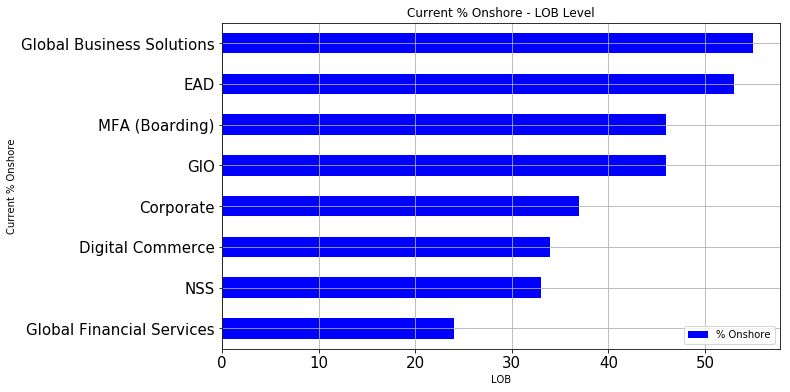

In [172]:
current_pivot_table_plot.plot(x=current_pivot_table_plot["LOB"], y='% Onshore', kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15, color='b')
#plt.legend(['myline'])
#plt.axis([10, 30, 10, 120])
plt.xlabel("LOB")
plt.ylabel("Current % Onshore")
plt.title("Current % Onshore - LOB Level")
#plt.show()
plt.savefig("Current%_Onshore_LOB_Level.pdf",bbox_inches='tight')

## Future State

In [173]:
future_pivot_table = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Final Location\n(Specify Offshore or Onsite)'], aggfunc=np.size)
future_pivot_table.fillna(value=0, inplace=True)
future_pivot_table['Grand Total'] = future_pivot_table['Offshore'] + future_pivot_table['Onsite']
future_pivot_table['% Onshore'] = np.round((future_pivot_table['Onsite']/future_pivot_table['Grand Total'])*100)
future_pivot_table = future_pivot_table[future_pivot_table.index.get_level_values(1) == "N"]
#future_pivot_table.sort_values(by='% Onshore', ascending=False)
future_pivot_table_plot = current_pivot_table.reset_index().sort_values(by='% Onshore', ascending=True)
future_pivot_table_plot

Current Location,LOB,is Excluded (Y/N),Offshore,Onsite,Grand Total,% Onshore
5,Global Financial Services,N,110.0,34.0,144.0,24.0
7,NSS,N,38.0,19.0,57.0,33.0
1,Digital Commerce,N,35.0,18.0,53.0,34.0
0,Corporate,N,59.0,35.0,94.0,37.0
3,GIO,N,25.0,21.0,46.0,46.0
6,MFA (Boarding),N,33.0,28.0,61.0,46.0
2,EAD,N,7.0,8.0,15.0,53.0
4,Global Business Solutions,N,17.0,21.0,38.0,55.0


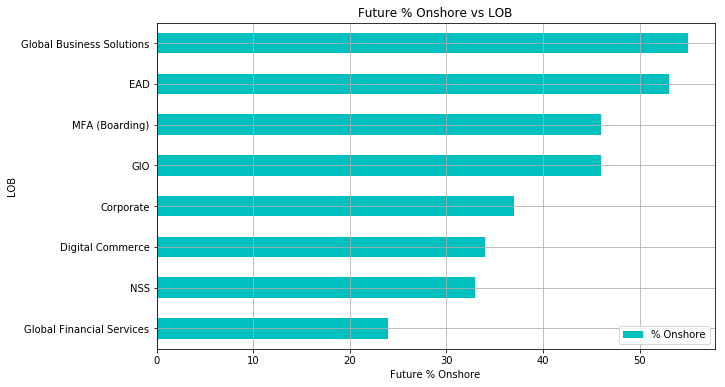

In [174]:
future_pivot_table_plot.plot(x=future_pivot_table_plot["LOB"], y='% Onshore', kind='barh', 
                         figsize=(10,6), grid=True, color='c')
plt.ylabel("LOB")
plt.xlabel("Future % Onshore")
plt.title("Future % Onshore vs LOB")
#plt.show()
plt.savefig("Future%_Onshore_LOB_Level.pdf",bbox_inches='tight')

In [175]:
df.columns

Index(['LOB', 'is Excluded (Y/N)', 'Current_Offshore', 'Current_Onsite',
       'Current_Grand Total', 'Current_%Onshore', 'Future_Offshore',
       'Future_Onsite', 'Future_Grand Total', 'Future_%Onshore'],
      dtype='object')

In [176]:
df = pd.concat([current_pivot_table, future_pivot_table], axis=1, join='inner')
df.reset_index(inplace=True)
df.columns = ['LOB', 'is Excluded (Y/N)', 'Current_Offshore', 'Current_Onsite', 'Current_Grand Total', 'Current_%Onshore', 'Future_Offshore', 'Future_Onsite',
       'Future_Grand Total', 'Future_%Onshore']
df

,LOB,is Excluded (Y/N),Current_Offshore,Current_Onsite,Current_Grand Total,Current_%Onshore,Future_Offshore,Future_Onsite,Future_Grand Total,Future_%Onshore
0,Corporate,N,59.0,35.0,94.0,37.0,62.0,32.0,94.0,34.0
1,Digital Commerce,N,35.0,18.0,53.0,34.0,42.0,11.0,53.0,21.0
2,EAD,N,7.0,8.0,15.0,53.0,10.0,5.0,15.0,33.0
3,GIO,N,25.0,21.0,46.0,46.0,25.0,21.0,46.0,46.0
4,Global Business Solutions,N,17.0,21.0,38.0,55.0,22.0,16.0,38.0,42.0
5,Global Financial Services,N,110.0,34.0,144.0,24.0,110.0,34.0,144.0,24.0
6,MFA (Boarding),N,33.0,28.0,61.0,46.0,39.0,22.0,61.0,36.0
7,NSS,N,38.0,19.0,57.0,33.0,42.0,15.0,57.0,26.0


In [177]:
sns.catplot(x="LOB", y="survived", hue="class", kind="bar", data=titanic);

AttributeError: module 'seaborn' has no attribute 'catplot'

## Current State Details

In [182]:
current_pivot_table_dtl = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
                                     columns=['Current Location '], aggfunc=np.size)
current_pivot_table_dtl.fillna(value=0, inplace=True)
current_pivot_table_dtl['Grand Total'] = current_pivot_table_dtl['Offshore'] + current_pivot_table_dtl['Onsite']
current_pivot_table_dtl['% Onshore'] = np.round((current_pivot_table_dtl['Onsite']/current_pivot_table_dtl['Grand Total'])*100)
#current_pivot_table_dtl = current_pivot_table_dtl[current_pivot_table_dtl.index.get_level_values(7) == "N"]
#current_pivot_table_dtl.sort_values(by='% Onshore', ascending=False)
current_pivot_table_dtl

Current Location                                                                                                                                                                                      Offshore  \
LOB              mgr - Level 1      mgr - Level 2          mgr - Level 3       mgr - Level 4         mgr - Level 5                     Application Name                            is Excluded (Y/N)             
Corporate        Guy Chiarello      Chris Augustin         Jorge Valdivia      Elizabeth Bacon       TBD                               BI Support                                  N                       1.0   
                                    Matt Figurski          Mark Makowsky       Patricia Hobza        TBD                               PASO Support                                N                       0.0   
                                                                               Shankar Govindarajalu TBD                               PASO Extract                                N                       2.0   
                                    Mike Manos             Jay Moran           Venkata Jaddu         TBD                               Service 360 Phase 3                         N                       3.0   
                                                           Mary Ekmalian       Don Stockslager       TBD                               Sales Reporting                             N                       0.0   
                                                                                                                                                                                   Y                       0.0   
                                                                                                                                       Sales to Revenue                            N                       4.0   
                                                                                                                                                                                   Y                       0.0   
                                                                               Mark Makowsky         Elena Ambrosio                    FD Infolease Support                        N                       0.0   
                                                                                                     Patricia Hobza                    PASO Support                                N                       1.0   
                                                                                                                                       Telecheck Production Support                N                       1.0   
                                                                                                     Shankar Govindarajalu             PASO Extract                                N                       1.0   
                                                                               Nandan Pai            Shams Nazar                       FD Corporate RMW-CARS                       N                       9.0   
                                                                                                                                                                                   Y                       0.0   
                                                                                                     Shubhen Chauhan                   Credit Risk Monitoring SEZ                  N                       8.0   
                                                                                                                                       Financial Fraud Monitoring SEZ              N                       3.0   
                                                                                                                                       IFM Real Time Fraud Detection               N                       3.0   
          

In [183]:
current_pivot_table_dtl_plot = current_pivot_table_dtl[current_pivot_table_dtl.index.get_level_values(7) == "N"]
current_pivot_table_dtl_plot= current_pivot_table_dtl_plot.reset_index().sort_values(by="% Onshore")
current_pivot_table_dtl_plot

Current Location,LOB,mgr - Level 1,mgr - Level 2,mgr - Level 3,mgr - Level 4,mgr - Level 5,Application Name,is Excluded (Y/N),Offshore,Onsite,Grand Total,% Onshore
0,Corporate,Guy Chiarello,Chris Augustin,Jorge Valdivia,Elizabeth Bacon,TBD,BI Support,N,1.0,0.0,1.0,0.0
42,Global Business Solutions,Guy Chiarello,Chris Augustin,Steve Lynch,Tom Howe,TBD,HDC Production Support,N,2.0,0.0,2.0,0.0
49,Global Financial Services,Guy Chiarello,Tony Hai,Cindy Bender,TBD,TBD,ODEV5,N,1.0,0.0,1.0,0.0
50,Global Financial Services,Guy Chiarello,Tony Hai,Cindy Bender,TBD,TBD,ODEV6,N,3.0,0.0,3.0,0.0
51,Global Financial Services,Guy Chiarello,Tony Hai,Cindy Bender,TBD,TBD,ODEV8,N,4.0,0.0,4.0,0.0
54,Global Financial Services,Guy Chiarello,Tony Hai,Cindy Bender,TBD,TBD,TM033,N,2.0,0.0,2.0,0.0
56,Global Financial Services,Guy Chiarello,Tony Hai,David Probst,TBD,TBD,Evolve,N,3.0,0.0,3.0,0.0
59,Global Financial Services,Guy Chiarello,Tony Hai,David Probst,TBD,TBD,JAVA04 CTB,N,1.0,0.0,1.0,0.0
63,Global Financial Services,Guy Chiarello,Tony Hai,Frank Barker,TBD,TBD,TM029,N,5.0,0.0,5.0,0.0
68,Global Financial Services,Guy Chiarello,Tony Hai,Frank Barker,TBD,TBD,TM26D,N,2.0,0.0,2.0,0.0


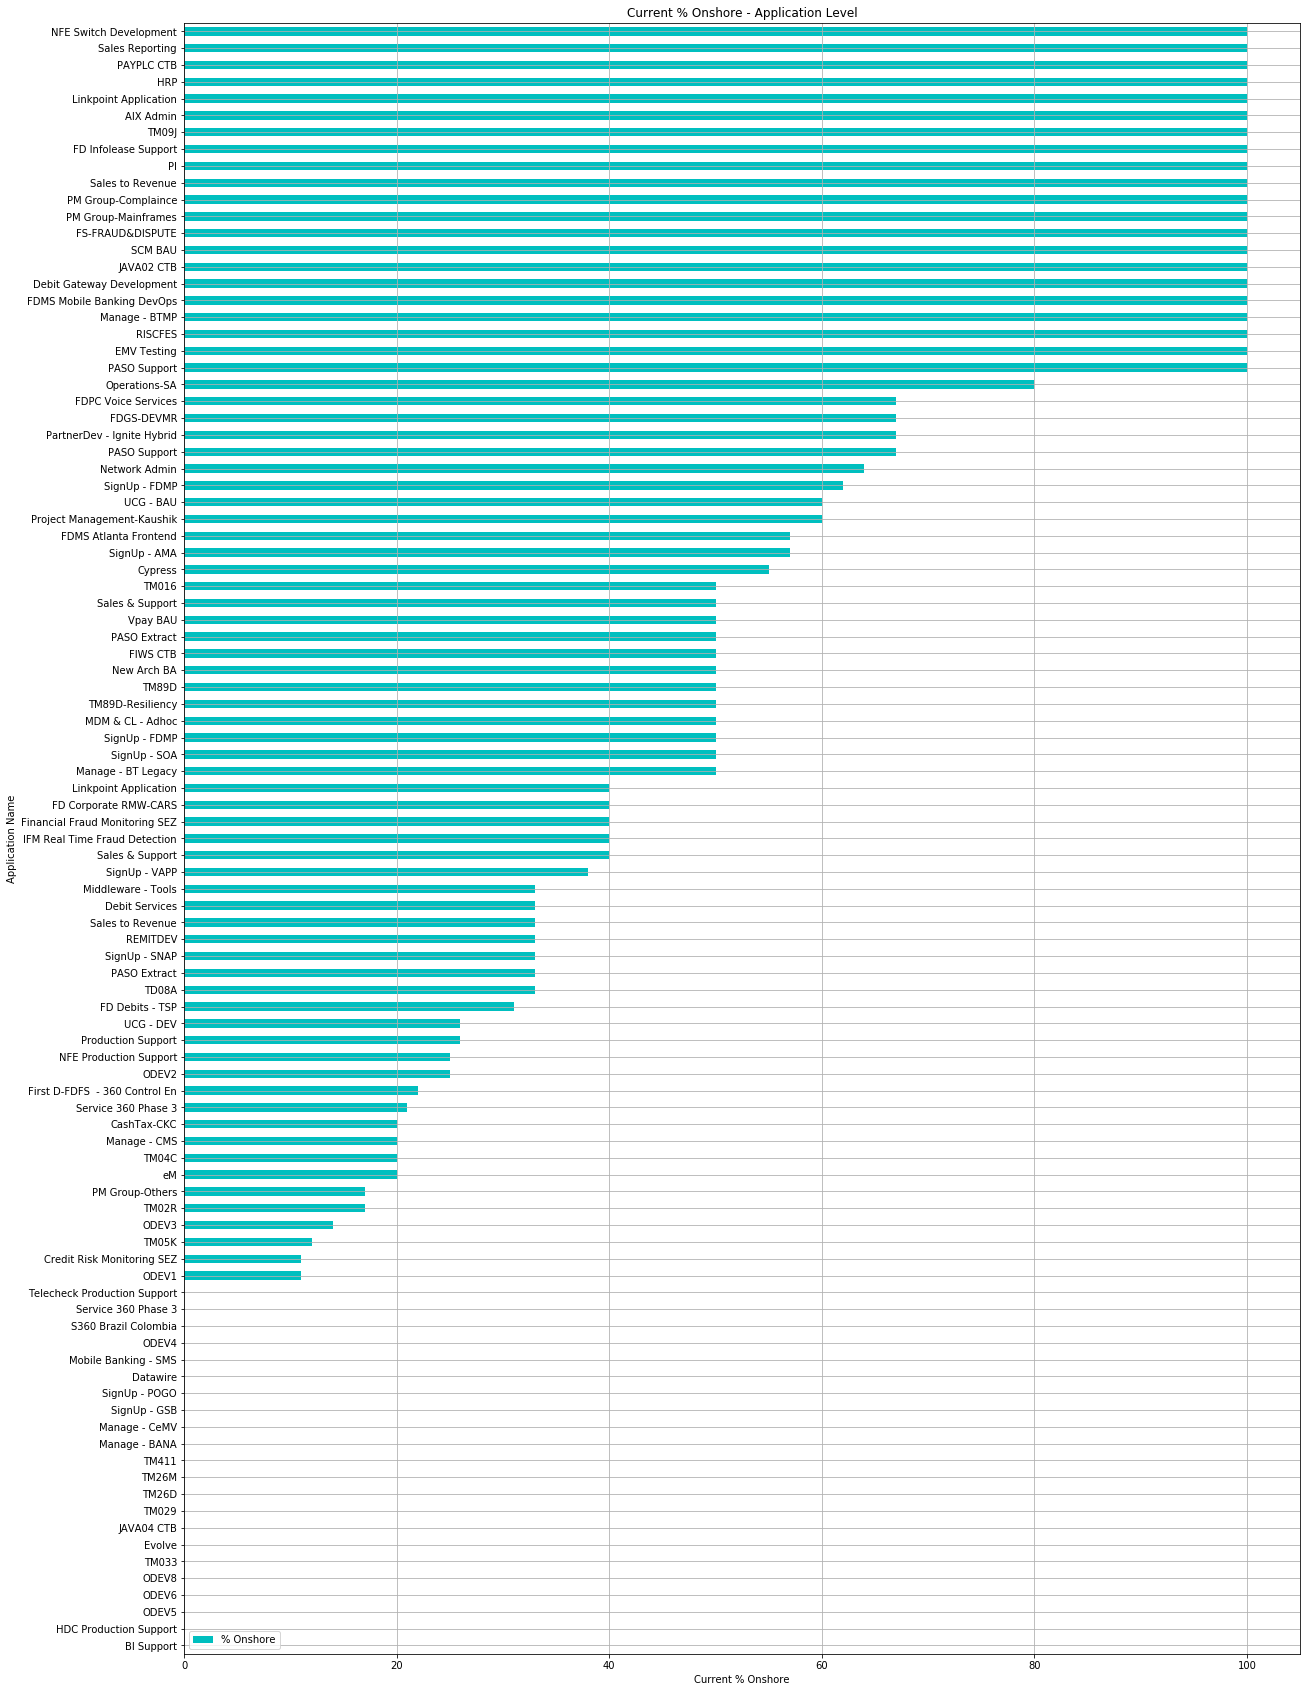

In [185]:
current_pivot_table_dtl_plot = current_pivot_table_dtl[current_pivot_table_dtl.index.get_level_values(7) == "N"]
current_pivot_table_dtl_plot= current_pivot_table_dtl_plot.reset_index().sort_values(by="% Onshore")
current_pivot_table_dtl_plot.plot(x=current_pivot_table_dtl_plot["Application Name"], y='% Onshore', kind='barh', 
                         figsize=(20,30), grid=True, color='c')
plt.ylabel("Application Name")
plt.xlabel("Current % Onshore")
plt.title("Current % Onshore - Application Level")
#plt.show()
#plt.savefig("Current%_Onshore_Application_Level.pdf",bbox_inches='tight')

## Future State Details

In [43]:
future_pivot_table_dtl = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
                                     columns=['Current Location '], aggfunc=np.size)
future_pivot_table_dtl.fillna(value=0, inplace=True)
future_pivot_table_dtl['Grand Total'] = future_pivot_table_dtl['Offshore'] + future_pivot_table_dtl['Onsite']
future_pivot_table_dtl['% Onshore'] = np.round((future_pivot_table_dtl['Onsite']/future_pivot_table_dtl['Grand Total'])*100)
future_pivot_table_dtl

Current Location                                                                                                                                                             Offshore  \
LOB                       mgr - Level 1 mgr - Level 2  mgr - Level 3     mgr - Level 4   mgr - Level 5                     Application Name               is Excluded (Y/N)             
Corporate                 Guy Chiarello Mike Manos     Mary Ekmalian     Mark Makowsky   Elena Ambrosio                    FD Infolease Support           N                       0.0   
                                                                                         Patricia Hobza                    PASO Support                   N                       1.0   
                                                                                                                           Telecheck Production Support   N                       1.0   
                                                                                         Shankar Govindarajalu             PASO Extract                   N                       1.0   
                                                                         Nandan Pai      Shams Nazar                       FD Corporate RMW-CARS          N                       9.0   
                                                                                                                                                          Y                       0.0   
                                                                                         Shubhen Chauhan                   Credit Risk Monitoring SEZ     N                       8.0   
                                                                                                                           Financial Fraud Monitoring SEZ N                       3.0   
                                                                                                                           IFM Real Time Fraud Detection  N                       3.0   
                                                                         Steve McCaffrey Tracy Ebersole                    Sales & Support                N                       3.0   
EAD                       Guy Chiarello Mike Manos     Sri Muthukrishnan -               Gregory Jablonski                 myFD                           Y                       1.0   
                                                                         Sebastian Seda  -                                 FD CAST                        Y                       2.0   
                                                                         Steve Allen     Jeffrey Kokosinski                Cypress                        N                       5.0   
                                                                         Thomas Place    Gurpreet Dhillon                  MDM & CL - Adhoc               N                       2.0   
Global Business Solutions Guy Chiarello Chris Augustin Steve Lynch       Ed David        Angela Flanery                    Debit Back Office              Y                       4.0   
                                                                                                                           FESS                           Y                       1.0   
                                                                                                                           FLBOSS                         Y                       1.0   
                                                                                                                           Merchant Manager               Y                       3.0   
                                                                                                                           Merchant Master                Y                       9.0   
                                                                                                                   

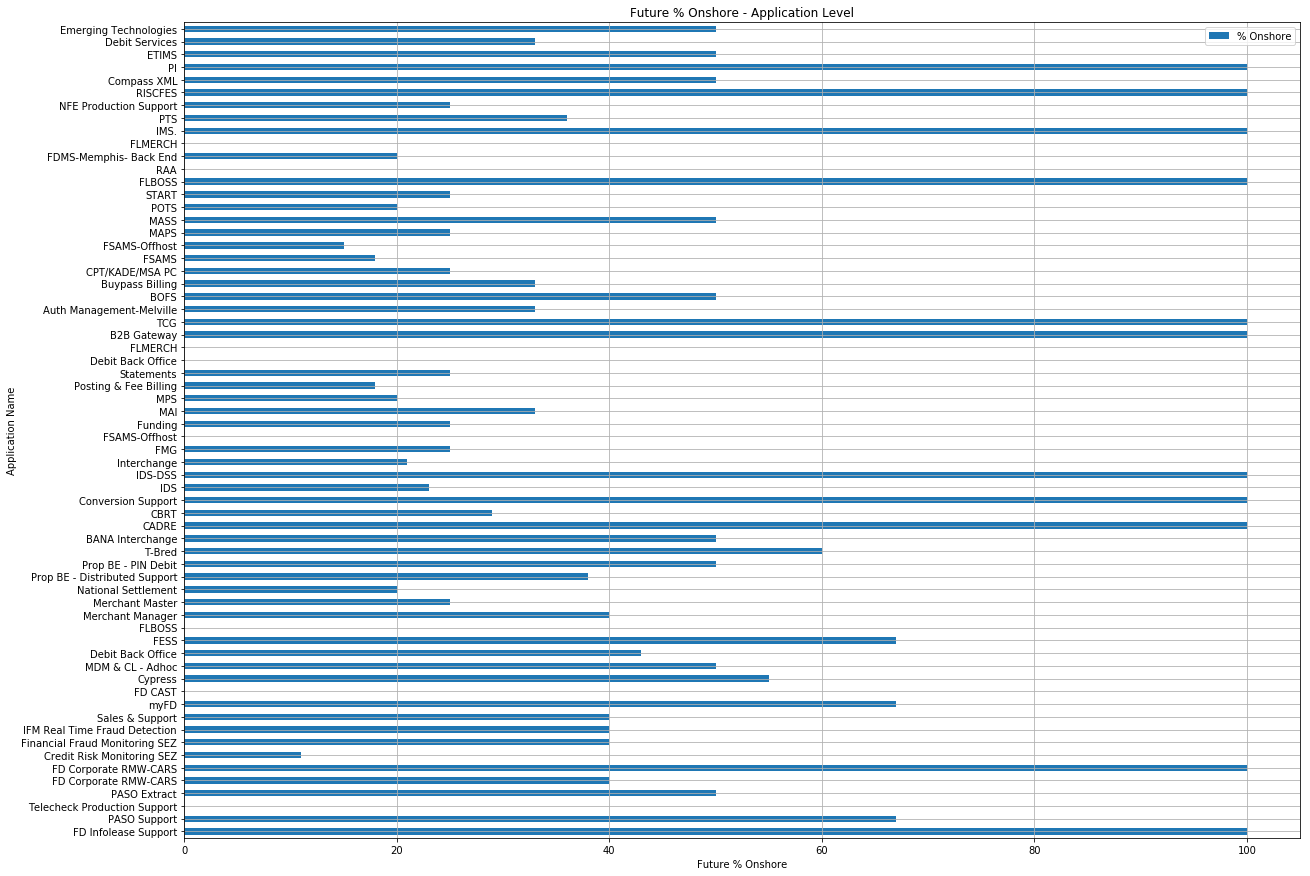

In [94]:
future_pivot_table_dtl.plot(x=future_pivot_table_dtl.index.get_level_values(6), y='% Onshore', kind='barh', 
                         figsize=(20,15), grid=True)
plt.ylabel("Application Name")
plt.xlabel("Future % Onshore")
plt.title("Future % Onshore - Application Level")
#plt.show()
plt.savefig("Future%_Onshore_LOB_Level.pdf",bbox_inches='tight')

## Current State SPAN Pivot

In [85]:
current_span_table = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Current SPAN'], aggfunc=np.size)
current_span_table.fillna(value=0, inplace=True)
current_span_table['Grand Total'] = current_span_table['L1'] + current_span_table['L2'] + current_span_table['L3']
current_span_table['L1 %'] = np.round((current_span_table['L1']/current_span_table['Grand Total'])*100)
current_span_table['L2 %'] = np.round((current_span_table['L2']/current_span_table['Grand Total'])*100)
current_span_table['L3 %'] = np.round((current_span_table['L3']/current_span_table['Grand Total'])*100)
current_span_table = current_span_table[current_span_table.index.get_level_values(1) == "N"]
current_span_table


,Current SPAN,L1,L2,L3,Grand Total,L1 %,L2 %,L3 %
LOB,is Excluded (Y/N),,,,,,,
Corporate,N,9.0,41.0,44.0,94.0,10.0,44.0,47.0
Digital Commerce,N,14.0,20.0,19.0,53.0,26.0,38.0,36.0
EAD,N,2.0,5.0,8.0,15.0,13.0,33.0,53.0
GIO,N,5.0,27.0,14.0,46.0,11.0,59.0,30.0
Global Business Solutions,N,3.0,15.0,20.0,38.0,8.0,39.0,53.0
Global Financial Services,N,35.0,53.0,56.0,144.0,24.0,37.0,39.0
MFA (Boarding),N,5.0,21.0,35.0,61.0,8.0,34.0,57.0
NSS,N,9.0,21.0,27.0,57.0,16.0,37.0,47.0


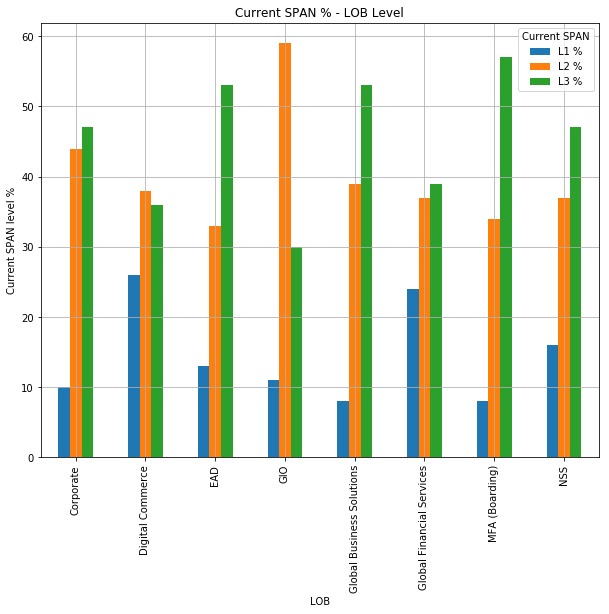

In [86]:
current_span_table.plot(x=current_span_table.index.get_level_values(0), y=['L1 %', 'L2 %', 'L3 %'], kind='bar', 
                         figsize=(10,8), grid=True)
plt.xlabel("LOB")
plt.ylabel("Current SPAN level %")
plt.title("Current SPAN % - LOB Level")
#plt.show()
plt.savefig("Current_SPAN%_LOB_Level.pdf",bbox_inches='tight')

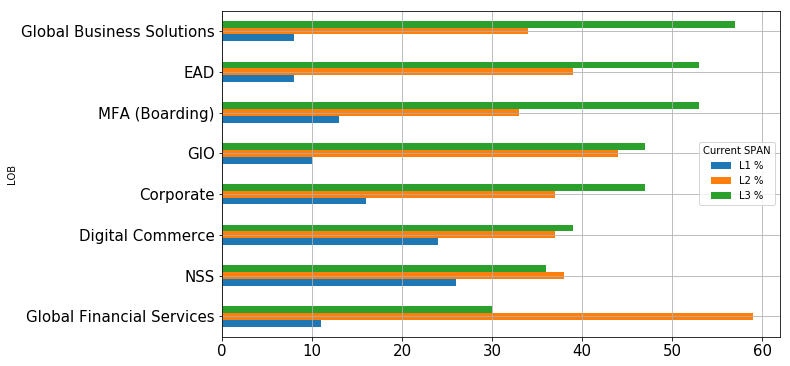

In [90]:
current_span_table_plot = current_span_table.reset_index().sort_values(by=['L3 %', 'L2 %', 'L1 %'], ascending=True)

current_span_table_plot.plot(x=current_pivot_table_plot["LOB"], y=['L1 %', 'L2 %', 'L3 %'], kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15)

In [91]:
current_span_table_plot

Current SPAN,LOB,is Excluded (Y/N),L1,L2,L3,Grand Total,L1 %,L2 %,L3 %
3,GIO,N,5.0,27.0,14.0,46.0,11.0,59.0,30.0
1,Digital Commerce,N,14.0,20.0,19.0,53.0,26.0,38.0,36.0
5,Global Financial Services,N,35.0,53.0,56.0,144.0,24.0,37.0,39.0
7,NSS,N,9.0,21.0,27.0,57.0,16.0,37.0,47.0
0,Corporate,N,9.0,41.0,44.0,94.0,10.0,44.0,47.0
2,EAD,N,2.0,5.0,8.0,15.0,13.0,33.0,53.0
4,Global Business Solutions,N,3.0,15.0,20.0,38.0,8.0,39.0,53.0
6,MFA (Boarding),N,5.0,21.0,35.0,61.0,8.0,34.0,57.0


## Future State SPAN 

In [195]:
df_span_latest = df_span[(df_span['Final Span\n(Specify L1 or L2 or L3) '] == 'L1') | 
                         (df_span['Final Span\n(Specify L1 or L2 or L3) '] == 'L2') |
                         (df_span['Final Span\n(Specify L1 or L2 or L3) '] == 'L3')]

In [96]:
df_span['Final Span\n(Specify L1 or L2 or L3) '].value_counts()

L3    421
L2    359
L1    321
0       2
Name: Final Span\n(Specify L1 or L2 or L3) , dtype: int64

In [97]:
df_span_latest

,Associate ID,Associate Name,LAN ID,Current Location,Current City,Current Rate,Total $$,Job Title,Current SPAN,Application Name,...,On / Off Correction (Y/N),Engagement Type,is Excluded (Y/N),Final Span (Specify L1 or L2 or L3),Final Location (Specify Offshore or Onsite),The revised Rate,Total $$.1,$$ Benefits,Comments from EM,LOB_num
0,430401,"Arindam,Chowdhury",FARCM8H,Offshore,Kolkata,26.78,53988.48,Application Developer - L3,L3,FD Corporate RMW-CARS,...,N,Type II,N,L2,Offshore,24.72,49835.52,4152.96,NaN,4
1,415751,"Krishnendu,Samadder",F83K17R,Offshore,Kolkata,24.72,49835.52,Application Development / Application Develope...,L2,FD Corporate RMW-CARS,...,N,Type II,N,L1,Offshore,22.66,45682.56,4152.96,NaN,4
2,454046,"Saikat,Banerjee",F9OZNWZ,Offshore,Kolkata,28.84,58141.44,N1-Developer - L2,L2,FD Corporate RMW-CARS,...,N,Type II,N,L1,Offshore,26.78,53988.48,4152.96,Proposed changes yet to be socialized with Lin...,4
3,260954,"Kaushik Krishnamurthy,Bhave",NaN,Onsite,Hunt Valley,66.95,134971.20,Application Development / Application Develope...,L3,FD Corporate RMW-CARS,...,Y,Type II,N,L1,Offshore,22.66,45682.56,89288.64,NaN,4
4,248533,"Chandrasekar,Kadirvelu",F47TWMT,Onsite,Omaha,66.95,134971.20,Application Development / Application Develope...,L3,FDPC Voice Services,...,Y,Type II,N,L1,Offshore,22.66,45682.56,89288.64,NaN,4
5,545306,"Prakasam,Govindan Chinna",NaN,Onsite,Omaha,77.25,155736.00,Niche 1 Skills / N1-Technical Lead,L3,PASO Extract,...,N,Type II,N,L2,Onsite,72.10,145353.60,10382.40,NaN,4
6,464964,"Bishwambhar,Sen",F3PHLZ8,Offshore,Kolkata,32.96,66447.36,Niche 2 Skills / N2-Developer - L2,L2,Sales to Revenue,...,N,Type II,N,L1,Offshore,28.84,58141.44,8305.92,NaN,4
7,318844,"Payel,Mondal",F9UR2O6,Offshore,Kolkata,26.78,53988.48,Application Development / Application Develope...,L3,Sales to Revenue,...,N,Type II,N,L2,Offshore,24.72,49835.52,4152.96,NaN,4
8,457180,"JOYDEEP,SARKAR",F5ZQNLL,Offshore,Kolkata,32.96,66447.36,Niche 2 Skills / N2-Technical Lead,L3,Service 360 Phase 3,...,N,Type II,N,L2,Offshore,30.90,62294.40,4152.96,NaN,4
9,400818,"Krishnandu,Sarkar",F4P74ZM,Offshore,Kolkata,30.90,62294.40,Niche 2 Skills / N2-Developer - L2,L2,Service 360 Phase 3,...,N,Type II,N,L1,Offshore,28.84,58141.44,4152.96,NaN,4


In [98]:
future_span_table = pd.pivot_table(data=df_span_latest,values='LOB_num', index=['LOB','is Excluded (Y/N)'], 
                                     columns=['Final Span\n(Specify L1 or L2 or L3) '], aggfunc=np.size)
future_span_table.fillna(value=0, inplace=True)
future_span_table['Grand Total'] = future_span_table['L1'] + future_span_table['L2'] + future_span_table['L3']
future_span_table['L1 %'] = np.round((future_span_table['L1']/future_span_table['Grand Total'])*100)
future_span_table['L2 %'] = np.round((future_span_table['L2']/future_span_table['Grand Total'])*100)
future_span_table['L3 %'] = np.round((future_span_table['L3']/future_span_table['Grand Total'])*100)
future_span_table = future_span_table[future_span_table.index.get_level_values(1) == "N"]
future_span_table

,Final Span (Specify L1 or L2 or L3),L1,L2,L3,Grand Total,L1 %,L2 %,L3 %
LOB,is Excluded (Y/N),,,,,,,
Corporate,N,23.0,39.0,32.0,94.0,24.0,41.0,34.0
Digital Commerce,N,16.0,19.0,18.0,53.0,30.0,36.0,34.0
EAD,N,3.0,5.0,7.0,15.0,20.0,33.0,47.0
GIO,N,5.0,27.0,14.0,46.0,11.0,59.0,30.0
Global Business Solutions,N,5.0,17.0,16.0,38.0,13.0,45.0,42.0
Global Financial Services,N,40.0,53.0,51.0,144.0,28.0,37.0,35.0
MFA (Boarding),N,6.0,24.0,31.0,61.0,10.0,39.0,51.0
NSS,N,11.0,20.0,26.0,57.0,19.0,35.0,46.0


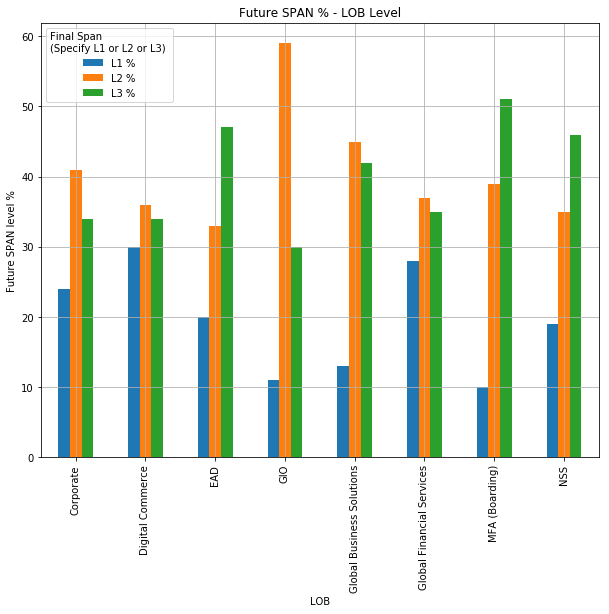

In [99]:
future_span_table.plot(x=future_span_table.index.get_level_values(0), y=['L1 %', 'L2 %', 'L3 %'], kind='bar', 
                         figsize=(10,8), grid=True)
plt.xlabel("LOB")
plt.ylabel("Future SPAN level %")
plt.title("Future SPAN % - LOB Level")
#plt.show()
plt.savefig("Future_SPAN%_LOB_Level.pdf",bbox_inches='tight')

## Current State SPAN Detail

In [196]:
current_span_table_dtl = pd.pivot_table(data=df_span,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
        columns=['Current SPAN'], aggfunc=np.size)
current_span_table_dtl.fillna(value=0, inplace=True)
current_span_table_dtl['Grand Total'] = current_span_table_dtl['L1'] + current_span_table_dtl['L2'] + current_span_table_dtl['L3']
current_span_table_dtl['L1 %'] = np.round((current_span_table_dtl['L1']/current_span_table_dtl['Grand Total'])*100)
current_span_table_dtl['L2 %'] = np.round((current_span_table_dtl['L2']/current_span_table_dtl['Grand Total'])*100)
current_span_table_dtl['L3 %'] = np.round((current_span_table_dtl['L3']/current_span_table_dtl['Grand Total'])*100)
current_span_table_dtl

Current SPAN                                                                                                                                                                                          L1  \
LOB              mgr - Level 1      mgr - Level 2          mgr - Level 3       mgr - Level 4         mgr - Level 5                     Application Name                          is Excluded (Y/N)         
Corporate        Guy Chiarello      Chris Augustin         Jorge Valdivia      Elizabeth Bacon       TBD                               BI Support                                N                   0.0   
                                    Matt Figurski          Mark Makowsky       Patricia Hobza        TBD                               PASO Support                              N                   0.0   
                                                                               Shankar Govindarajalu TBD                               PASO Extract                              N                   0.0   
                                    Mike Manos             Jay Moran           Venkata Jaddu         TBD                               Service 360 Phase 3                       N                   1.0   
                                                           Mary Ekmalian       Don Stockslager       TBD                               Sales Reporting                           N                   0.0   
                                                                                                                                                                                 Y                   1.0   
                                                                                                                                       Sales to Revenue                          N                   0.0   
                                                                                                                                                                                 Y                   2.0   
                                                                               Mark Makowsky         Elena Ambrosio                    FD Infolease Support                      N                   0.0   
                                                                                                     Patricia Hobza                    PASO Support                              N                   0.0   
                                                                                                                                       Telecheck Production Support              N                   0.0   
                                                                                                     Shankar Govindarajalu             PASO Extract                              N                   0.0   
                                                                               Nandan Pai            Shams Nazar                       FD Corporate RMW-CARS                     N                   0.0   
                                                                                                                                                                                 Y                   0.0   
                                                                                                     Shubhen Chauhan                   Credit Risk Monitoring SEZ                N                   2.0   
                                                                                                                                       Financial Fraud Monitoring SEZ            N                   1.0   
                                                                                                                                       IFM Real Time Fraud Detection             N                   2.0   
                                                                               Steve McCaffrey       Tracy Ebersole         

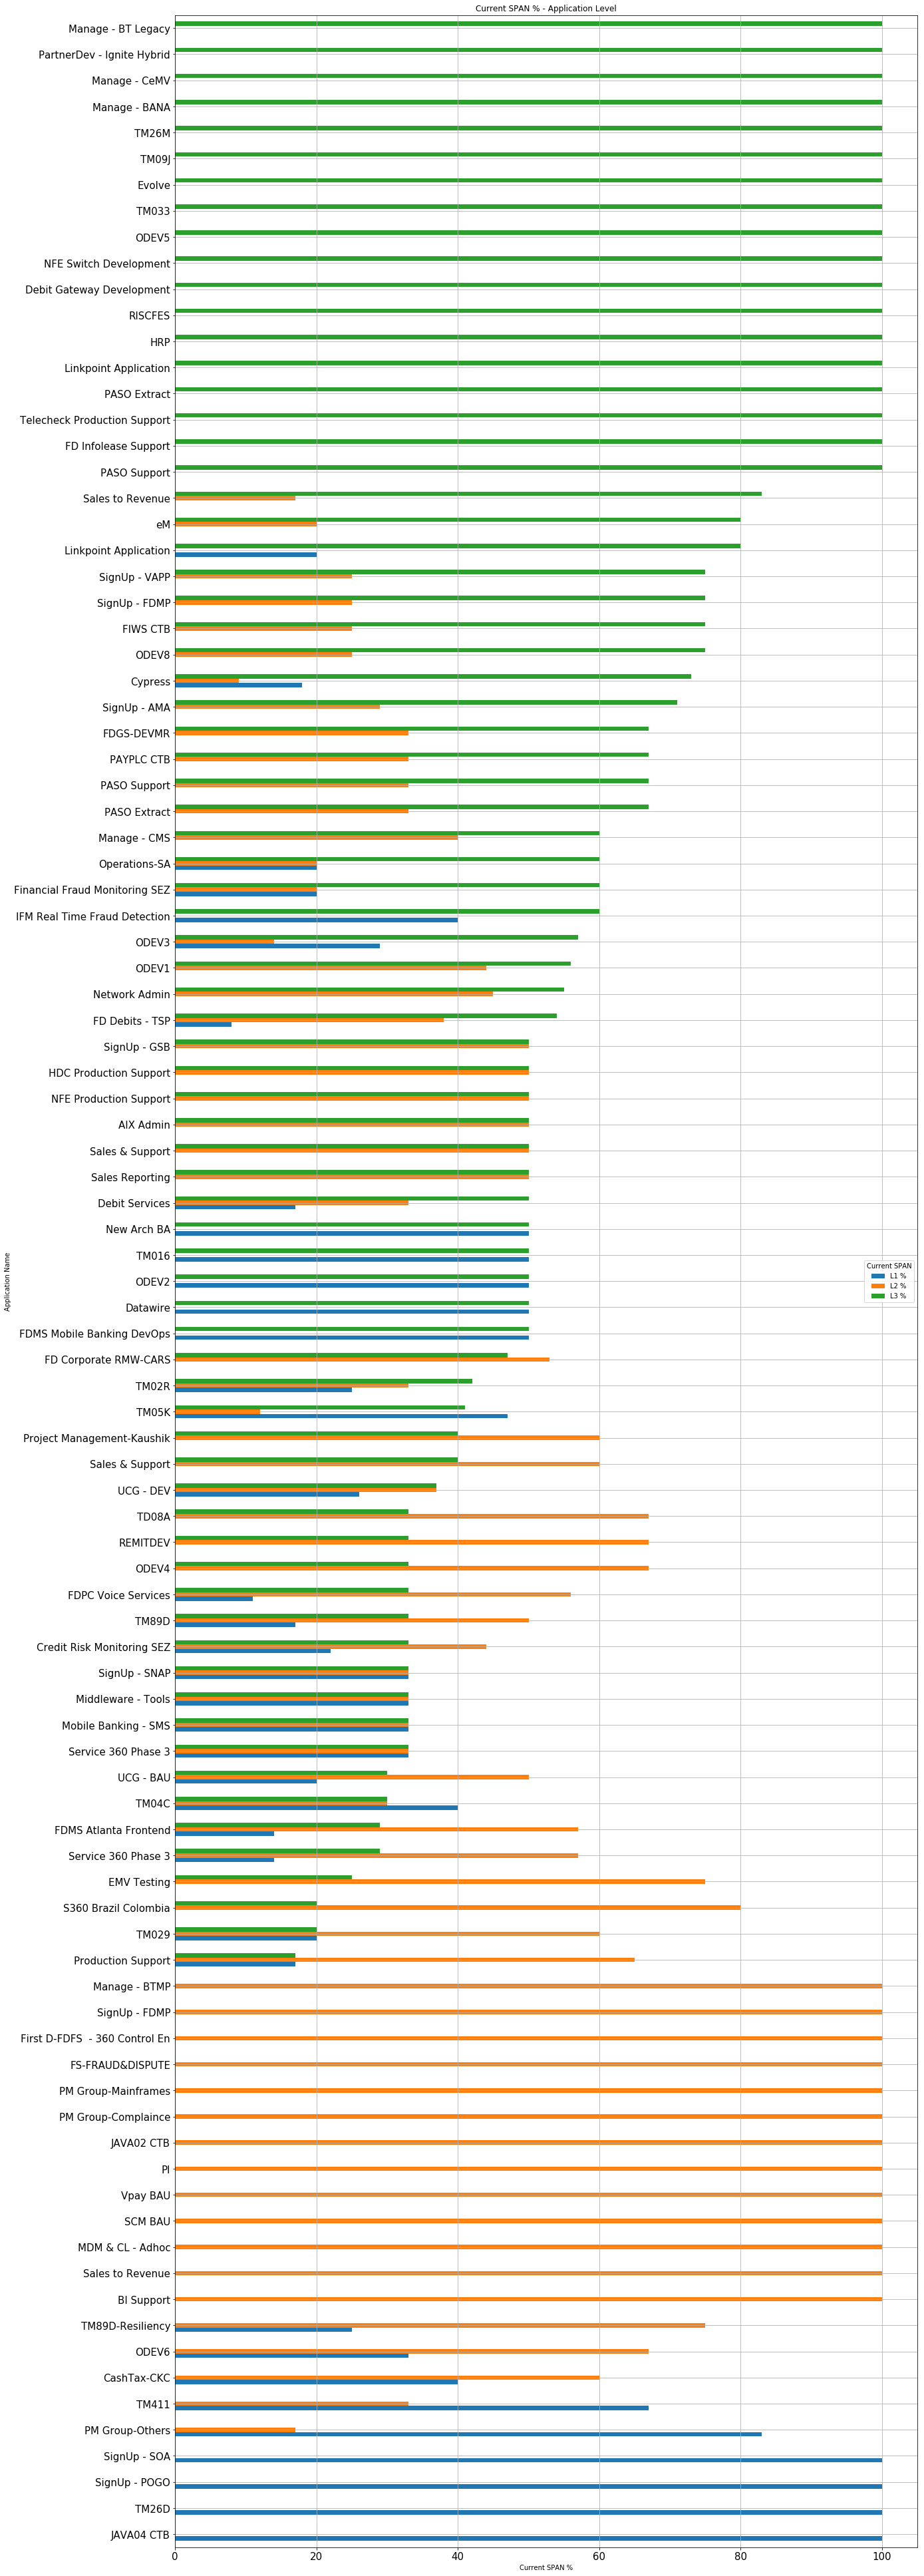

In [202]:
    current_span_table_dtl_plot = current_span_table_dtl[current_span_table_dtl.index.get_level_values(7) == "N"]
    current_span_table_dtl_plot= current_span_table_dtl_plot.reset_index().sort_values(by=['L3 %', 'L2 %', 'L1 %'])
    current_span_table_dtl_plot.plot(x=current_span_table_dtl_plot["Application Name"], y=['L1 %', 'L2 %', 'L3 %'], kind='barh', 
                             figsize=(20,70), grid=True,fontsize=15)
    plt.ylabel("Application Name")
    plt.xlabel("Current SPAN %")
    plt.title("Current SPAN % - Application Level")
    
    plt.savefig("Current_SPAN%_Application_Level.pdf",bbox_inches='tight')

## Future State SPAN Detail

In [101]:
future_span_table_dtl = pd.pivot_table(data=df_span_latest,values='LOB_num', index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
        columns=['Final Span\n(Specify L1 or L2 or L3) '], aggfunc=np.size)
future_span_table_dtl.fillna(value=0, inplace=True)
future_span_table_dtl['Grand Total'] = future_span_table_dtl['L1'] + future_span_table_dtl['L2'] + future_span_table_dtl['L3']
future_span_table_dtl['L1 %'] = np.round((future_span_table_dtl['L1']/future_span_table_dtl['Grand Total'])*100)
future_span_table_dtl['L2 %'] = np.round((future_span_table_dtl['L2']/future_span_table_dtl['Grand Total'])*100)
future_span_table_dtl['L3 %'] = np.round((future_span_table_dtl['L3']/future_span_table_dtl['Grand Total'])*100)
future_span_table_dtl

Final Span
(Specify L1 or L2 or L3)                                                                                                                                            L1  \
LOB                       mgr - Level 1 mgr - Level 2  mgr - Level 3     mgr - Level 4   mgr - Level 5                     Application Name               is Excluded (Y/N)         
Corporate                 Guy Chiarello Mike Manos     Mary Ekmalian     Mark Makowsky   Elena Ambrosio                    FD Infolease Support           N                   0.0   
                                                                                         Patricia Hobza                    PASO Support                   N                   0.0   
                                                                                                                           Telecheck Production Support   N                   1.0   
                                                                                         Shankar Govindarajalu             PASO Extract                   N                   0.0   
                                                                         Nandan Pai      Shams Nazar                       FD Corporate RMW-CARS          N                   4.0   
                                                                                                                                                          Y                   0.0   
                                                                                         Shubhen Chauhan                   Credit Risk Monitoring SEZ     N                   2.0   
                                                                                                                           Financial Fraud Monitoring SEZ N                   1.0   
                                                                                                                           IFM Real Time Fraud Detection  N                   2.0   
                                                                         Steve McCaffrey Tracy Ebersole                    Sales & Support                N                   0.0   
EAD                       Guy Chiarello Mike Manos     Sri Muthukrishnan -               Gregory Jablonski                 myFD                           Y                   1.0   
                                                                         Sebastian Seda  -                                 FD CAST                        Y                   0.0   
                                                                         Steve Allen     Jeffrey Kokosinski                Cypress                        N                   2.0   
                                                                         Thomas Place    Gurpreet Dhillon                  MDM & CL - Adhoc               N                   1.0   
Global Business Solutions Guy Chiarello Chris Augustin Steve Lynch       Ed David        Angela Flanery                    Debit Back Office              Y                   1.0   
                                                                                                                           FESS                           Y                   0.0   
                                                                                                                           FLBOSS                         Y                   0.0   
                                                                                                                           Merchant Manager               Y                   0.0   
                                                                                                                           Merchant Master                Y                   2.0   
                                                                                                                           National Settlement            Y                   1.0   
                  

## Benefit Analysis - App Level

In [192]:
span_table_dtl = pd.pivot_table(data=df_span_latest,values=['$$ Benefits', 'Total $$.1', 'Total $$'], index=['LOB','mgr - Level 1','mgr - Level 2',
       'mgr - Level 3','mgr - Level 4','mgr - Level 5','Application Name','is Excluded (Y/N)'], 
        aggfunc=np.sum)
span_table_dtl.fillna(value=0, inplace=True)
span_table_dtl = span_table_dtl[span_table_dtl.index.get_level_values(7) == "N"]
span_table_dtl

$$ Benefits  \
LOB                       mgr - Level 1 mgr - Level 2  mgr - Level 3     mgr - Level 4   mgr - Level 5                     Application Name               is Excluded (Y/N)                
Corporate                 Guy Chiarello Mike Manos     Mary Ekmalian     Mark Makowsky   Elena Ambrosio                    FD Infolease Support           N                         0.00   
                                                                                         Patricia Hobza                    PASO Support                   N                         0.00   
                                                                                                                           Telecheck Production Support   N                      8305.92   
                                                                                         Shankar Govindarajalu             PASO Extract                   N                     10382.40   
                                                                         Nandan Pai      Shams Nazar                       FD Corporate RMW-CARS          N                    132894.72   
                                                                                         Shubhen Chauhan                   Credit Risk Monitoring SEZ     N                         0.00   
                                                                                                                           Financial Fraud Monitoring SEZ N                         0.00   
                                                                                                                           IFM Real Time Fraud Detection  N                         0.00   
                                                                         Steve McCaffrey Tracy Ebersole                    Sales & Support                N                         0.00   
EAD                       Guy Chiarello Mike Manos     Sri Muthukrishnan Steve Allen     Jeffrey Kokosinski                Cypress                        N                    359231.04   
                                                                         Thomas Place    Gurpreet Dhillon                  MDM & CL - Adhoc               N                      8305.92   
Global Business Solutions Guy Chiarello Chris Augustin Steve Lynch       Tom Howe        Jennifer Thorton                  NFE Production Support         N                      4152.96   
                                                                                                                           RISCFES                        N                         0.00   
                                                       TBD               Tom Howe        Jennifer Thorton                  PI                             N                     80982.72   
NSS                       Guy Chiarello Tony Hai       Hartley Caldwell  Jean Sindaco    Vlad / Dave / Amy / Celia / Munir Debit Services                 N                    195189.12   

                                                                                                                                                                               Total $$  \
LOB                       mgr - Level 1 mgr - Level 2  mgr - Level 3     mgr - Level 4   mgr - Level 5                     Application Name               is Excluded (Y/N)               
Corporate                 Guy Chiarello Mike Manos     Mary Ekmalian     Mark Makowsky   Elena Ambrosio                    FD Infolease Support           N                   155736.00   
                                                                                         Patricia Hobza                    PASO Support                   N                   369613.44   
                                                                                                                           Telecheck Production Support   N                    53988.48   
                                         

In [158]:
span_table_dtl["$$ Benefits"]

LOB                        mgr - Level 1  mgr - Level 2   mgr - Level 3      mgr - Level 4    mgr - Level 5                      Application Name                is Excluded (Y/N)
Corporate                  Guy Chiarello  Mike Manos      Mary Ekmalian      Mark Makowsky    Elena Ambrosio                     FD Infolease Support            N                         0.00
                                                                                              Patricia Hobza                     PASO Support                    N                         0.00
                                                                                                                                 Telecheck Production Support    N                      8305.92
                                                                                              Shankar Govindarajalu              PASO Extract                    N                     10382.40
                                                     

In [141]:
span_table_dtl_plot = span_table_dtl_plot[["Application Name", "$$ Benefits"]]
span_table_dtl_plot.rename(columns={'$$ Benefits': 'Benefits'}, inplace=True)

span_table_dtl_plot.plot(x="Application Name", y=str("Benefits"), kind='barh', 
                         figsize=(10,6), grid=True, color='c')

In [142]:
span_table_dtl_plot

,Application Name,Benefits
0,FD Infolease Support,0.00
1,PASO Support,0.00
5,Credit Risk Monitoring SEZ,0.00
6,Financial Fraud Monitoring SEZ,0.00
7,IFM Real Time Fraud Detection,0.00
8,Sales & Support,0.00
12,RISCFES,0.00
11,NFE Production Support,4152.96
10,MDM & CL - Adhoc,8305.92
2,Telecheck Production Support,8305.92


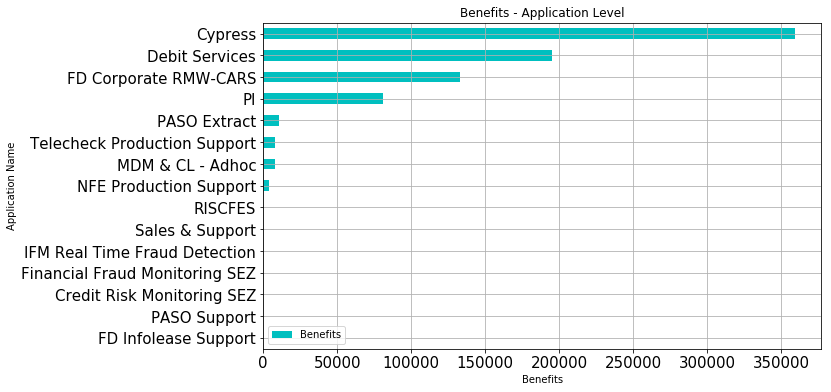

In [149]:
#span_table_dtl_plot = span_table_dtl.reset_index().sort_values(by=['$$ Benefits'], ascending=True)

span_table_dtl_plot.plot(x="Application Name", y=str("Benefits"), kind='barh', 
                         figsize=(10,6), grid=True, color='c',fontsize=15)
plt.xlabel("Benefits")
plt.ylabel("Application Name")
plt.title("Benefits - Application Level")

plt.savefig("Benefits_Application_Level.pdf",bbox_inches='tight')

In [104]:
span_table_dtl.plot(x=span_table_dtl.index.get_level_values(6), y='$$ Benefits', kind='bar', 
                         figsize=(10,8), grid=True)
plt.xlabel("LOB")
plt.ylabel("Future SPAN level %")
plt.title("Future SPAN % - LOB Level")
plt.show()

ValueError: 
$$ Benefits
^
Expected end of text (at char 0), (line:1, col:1)

## Benefit Analysis

In [105]:
span_table_dtl1 = pd.pivot_table(data=df_span_latest,values=['$$ Benefits', 'Total $$.1', 'Total $$'], index=['LOB',
                'is Excluded (Y/N)'], aggfunc=np.sum)
span_table_dtl1.fillna(value=0, inplace=True)
span_table_dtl1['% Benefits'] = np.round((span_table_dtl1['$$ Benefits']/span_table_dtl1['Total $$'])*100)
span_table_dtl1 = span_table_dtl1.query('LOB == ["Corporate", "Digital Commerce", "EAD", "GIO","Global Business Solutions", "Global Financial Services","MFA (Boarding)", "NSS"]')
span_table_dtl1 = span_table_dtl1[span_table_dtl1.index.get_level_values(1) == "N"]
#span_table_dtl1

In [108]:
span_table_dtl1_plot

,LOB,is Excluded (Y/N),$$ Benefits,Total $$,Total $$.1,% Benefits
3,GIO,N,0.00,4701150.72,4701150.72,0.0
5,Global Financial Services,N,31147.20,10332564.48,10301417.28,0.0
0,Corporate,N,386225.28,9572572.80,9186347.52,4.0
7,NSS,N,345683.52,4989257.28,4643573.76,7.0
6,MFA (Boarding),N,582886.08,6183757.44,5600871.36,9.0
4,Global Business Solutions,N,413219.52,3704440.32,3291220.80,11.0
1,Digital Commerce,N,624980.16,4341919.68,3716939.52,14.0
2,EAD,N,367536.96,1956044.16,1588507.20,19.0


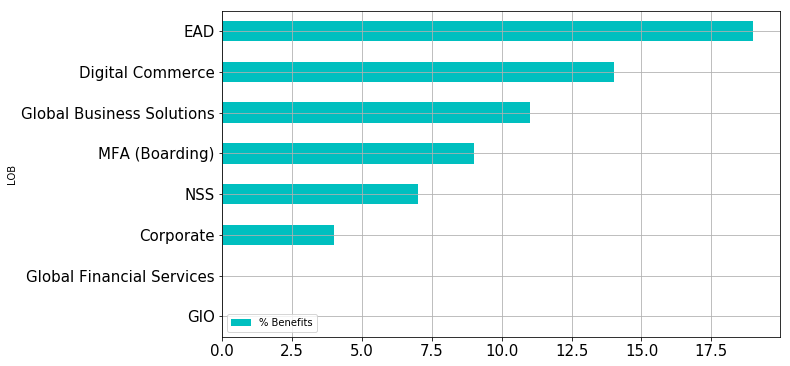

In [110]:
span_table_dtl1_plot = span_table_dtl1.reset_index().sort_values(by=['% Benefits'], ascending=True)

span_table_dtl1_plot.plot(x=span_table_dtl1_plot["LOB"], y=['% Benefits'], kind='barh', 
                         figsize=(10,6), grid=True, fontsize=15, color='c')

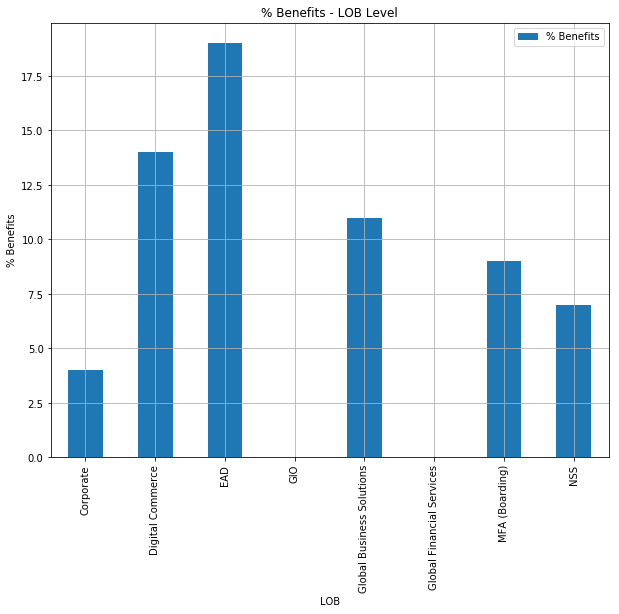

In [97]:
span_table_dtl1.plot(x=span_table_dtl1.index.get_level_values(0), y=['% Benefits'], kind='bar', 
                         figsize=(10,8), grid=True)
plt.xlabel("LOB")
plt.ylabel("% Benefits")
plt.title("% Benefits - LOB Level")
#plt.show()
plt.savefig("Benefits_LOB_Level.pdf",bbox_inches='tight')

In [217]:
## Write to Excel

writer = pd.ExcelWriter('ON_OFF_SPAN_Corrections_Final_09052018.xlsx')
df_span.to_excel(writer,'Associate Base Data')
current_pivot_table.to_excel(writer,'Current On-Off LOB level')
future_pivot_table.to_excel(writer,'Future On-Off LOB level')
current_pivot_table_dtl.to_excel(writer,'Current On-Off Appl level')
future_pivot_table_dtl.to_excel(writer,'Future On-Off Appl level')
current_span_table.to_excel(writer,'Current SPAN LOB level')
future_span_table.to_excel(writer,'Future SPAN LOB level')
current_span_table_dtl.to_excel(writer,'Current SPAN APPL level')
future_span_table_dtl.to_excel(writer,'Future SPAN APPL level')
span_table_dtl.to_excel(writer, 'Benefit Analysis - APPL level')
span_table_dtl1.to_excel(writer, 'Benefit Analysis -LOB level')

writer.save()

## EDA

In [199]:
span_table_dtl1.index.get_level_values(0)

Index(['Corporate', 'Digital Commerce', 'EAD', 'GIO',
       'Global Business Solutions', 'Global Financial Services',
       'MFA (Boarding)', 'NSS'],
      dtype='object', name='LOB')

In [202]:
span_table_dtl1.columns

Index(['$$ Benefits', 'Total $$', 'Total $$.1', '% Benefits'], dtype='object')

In [203]:
span_table_dtl1['% Benefits']

LOB                        is Excluded (Y/N)
Corporate                  N                     4.0
Digital Commerce           N                    14.0
EAD                        N                    19.0
GIO                        N                     0.0
Global Business Solutions  N                    11.0
Global Financial Services  N                     0.0
MFA (Boarding)             N                     9.0
NSS                        N                     7.0
Name: % Benefits, dtype: float64